# 🌍 Multi-Language Detection Model

## Project Overview
This notebook builds a machine learning model to detect and classify text across 5 languages:
- 🇬🇧 English
- 🇪🇸 Spanish
- 🇫🇷 French
- 🇩🇪 German
- 🇸🇦 Arabic

## Notebook Structure
1. **Data Loading & Exploration** - Understanding our dataset
2. **Data Preprocessing** - Cleaning and preparing text data
3. **Exploratory Data Analysis (EDA)** - Visualizing language distributions and patterns
4. **Feature Engineering** - Converting text to numerical features
5. **Model Training** - Building and training multiple ML models
6. **Model Evaluation** - Comparing model performance
7. **Hand Testing** - Testing our model with custom inputs

## Key Focus Areas
- ✅ Text preprocessing best practices
- ✅ Comprehensive visualizations
- ✅ Multiple model comparison
- ✅ Real-world testing capabilities

---
Let's get started! 🚀

## 📚 Import Libraries

Importing all necessary libraries for:
- **Data manipulation**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **Text processing**: re, string
- **Machine Learning**: scikit-learn
- **Progress tracking**: warnings (to suppress unnecessary warnings)

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Text processing
import re
import string
from collections import Counter

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Machine Learning - Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4


## 📂 Load Dataset

Loading the `data.csv` file and performing initial exploration to understand:
- Dataset shape (rows and columns)
- Column names and data types
- First few records
- Basic statistics

In [ ]:
# Load the dataset
df = pd.read_csv('/kaggle/input/language-sentence-en-es-fr-de-ar/data.csv')

# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Display column information
print("Column Information:")
print(df.info())

print("\n" + "="*60)
print("FIRST 5 ROWS")
print("="*60)
display(df.head())

print("\n" + "="*60)
print("LAST 5 ROWS")
print("="*60)
display(df.tail())

print("\n" + "="*60)
print("RANDOM SAMPLE (5 rows)")
print("="*60)
display(df.sample(5, random_state=42))

DATASET OVERVIEW

📊 Dataset Shape: 2072392 rows × 2 columns

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072392 entries, 0 to 2072391
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Sentence  object
 1   Language  object
dtypes: object(2)
memory usage: 31.6+ MB
None

FIRST 5 ROWS


,Sentence,Language
0,­,German
1,.,German
2,"0,00001% der Stimmrechte (das entspricht 14 St...",German
3,"0,00001% der Stimmrechte (das entspricht 257 S...",German
4,00:00 DGAP-AFR: AGROB Immobilien AG: Bekanntma...,German



LAST 5 ROWS


,Sentence,Language
2072387,Dos pandas bebé están durmiendo,Spanish
2072388,Un niño entra y sale corriendo de las olas del...,Spanish
2072389,Un hombre está cortando un limón,Spanish
2072390,La mujer no lleva una chaqueta roja y no sosti...,Spanish
2072391,Una mujer y tres hombres posan para una foto,Spanish



RANDOM SAMPLE (5 rows)


,Sentence,Language
1012921,Hundreds of local people have reported 'bigfoo...,English
1424901,Strangulation is defined as intentionally obst...,English
524986,This is the only sure-fire way to know if pois...,English
1124108,The goji berry was celebrated as early as the ...,English
955729,The CFD test set provides improved early ident...,English


## 🔍 Data Quality Assessment

Checking for potential data quality issues:
- **Missing values**: Identifying null/empty entries
- **Duplicate records**: Finding repeated entries
- **Language distribution**: Understanding class balance
- **Text length statistics**: Analyzing text samples

In [ ]:
print("="*60)
print("DATA QUALITY CHECKS")
print("="*60)

# Check for missing values
print("\n1️⃣ Missing Values:")
print("-" * 40)
missing_data = df.isnull().sum()
print(missing_data)
print(f"\nTotal missing values: {missing_data.sum()}")

# Check for duplicate rows
print("\n2️⃣ Duplicate Records:")
print("-" * 40)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df)*100):.2f}%")

# Check data types
print("\n3️⃣ Data Types:")
print("-" * 40)
print(df.dtypes)

# Assuming the dataset has columns: 'text' and 'language'
# Adjust column names if different
print("\n4️⃣ Column Names:")
print("-" * 40)
print(df.columns.tolist())

# Check for empty strings or whitespace-only entries
if 'text' in df.columns:
    empty_texts = df['text'].str.strip().eq('').sum()
    print(f"\n5️⃣ Empty/Whitespace-only texts: {empty_texts}")

# Basic statistics
print("\n6️⃣ Dataset Statistics:")
print("-" * 40)
print(df.describe(include='all'))

DATA QUALITY CHECKS

1️⃣ Missing Values:
----------------------------------------
Sentence    0
Language    0
dtype: int64

Total missing values: 0

2️⃣ Duplicate Records:
----------------------------------------
Number of duplicate rows: 22993
Percentage of duplicates: 1.11%

3️⃣ Data Types:
----------------------------------------
Sentence    object
Language    object
dtype: object

4️⃣ Column Names:
----------------------------------------
['Sentence', 'Language']

6️⃣ Dataset Statistics:
----------------------------------------
                                    Sentence Language
count                                2072392  2072392
unique                               2049399        5
top     Un hombre está tocando una guitarra.  English
freq                                      32  1534699


## 📊 Language Distribution Visualization

Analyzing the distribution of languages in our dataset:
- **Count of samples per language**: Understanding class balance
- **Percentage distribution**: Identifying potential class imbalance
- **Visual representations**: Bar plots and pie charts for better insights

Class imbalance can affect model performance, so it's crucial to identify it early!

LANGUAGE DISTRIBUTION ANALYSIS

📈 Sample Count per Language:
----------------------------------------
Language
English    1534699
French      320162
German      100000
Arabic       99999
Spanish      17532
Name: count, dtype: int64

📊 Percentage Distribution:
----------------------------------------
English: 74.05%
French: 15.45%
German: 4.83%
Arabic: 4.83%
Spanish: 0.85%


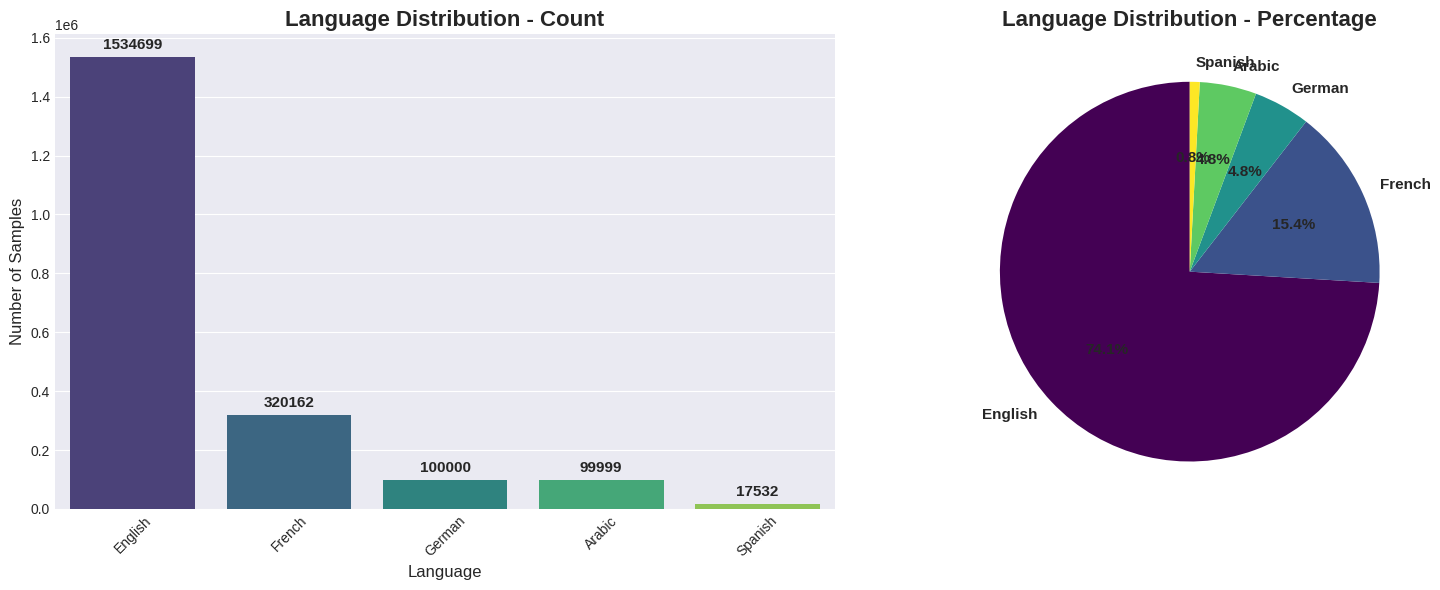


⚖️ Class Balance Assessment:
----------------------------------------
Imbalance Ratio (max/min): 87.54
⚠️ WARNING: Significant class imbalance detected!
   Consider using techniques like stratified sampling or class weights.


In [ ]:
language_col = 'Language'

print("="*60)
print("LANGUAGE DISTRIBUTION ANALYSIS")
print("="*60)

# Count of each language
print("\n📈 Sample Count per Language:")
print("-" * 40)
language_counts = df[language_col].value_counts()
print(language_counts)

# Percentage distribution
print("\n📊 Percentage Distribution:")
print("-" * 40)
language_percentage = df[language_col].value_counts(normalize=True) * 100
for lang, pct in language_percentage.items():
    print(f"{lang}: {pct:.2f}%")

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
sns.barplot(x=language_counts.index, y=language_counts.values,
            palette='viridis', ax=axes[0])
axes[0].set_title('Language Distribution - Count', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Language', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(language_counts.values):
    axes[0].text(i, v + max(language_counts.values)*0.01, str(v),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
colors = plt.cm.viridis(np.linspace(0, 1, len(language_counts)))
axes[1].pie(language_counts.values, labels=language_counts.index,
           autopct='%1.1f%%', startangle=90, colors=colors,
           textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Language Distribution - Percentage', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
print("\n⚖️ Class Balance Assessment:")
print("-" * 40)
max_count = language_counts.max()
min_count = language_counts.min()
imbalance_ratio = max_count / min_count
print(f"Imbalance Ratio (max/min): {imbalance_ratio:.2f}")
if imbalance_ratio > 2:
    print("⚠️ WARNING: Significant class imbalance detected!")
    print("   Consider using techniques like stratified sampling or class weights.")
else:
    print("✅ Classes are relatively balanced.")

## ⚖️ Handling Class Imbalance

With an imbalance ratio of **87.54**, we need to balance our dataset to ensure fair model training.

**Strategy**: We'll use a combination approach:
1. **Undersample** the majority class (English) to prevent it from dominating
2. **Balance** all classes to have equal representation
3. Use **stratified splitting** to maintain distribution in train/test sets

This will help our model learn all languages equally well, especially Spanish which has very few samples.

BALANCING DATASET

📊 Original Distribution:
Language
English    1534699
French      320162
German      100000
Arabic       99999
Spanish      17532
Name: count, dtype: int64

🎯 Target samples per language: 50000

✅ Balanced Distribution:
Language
French     50000
German     50000
English    50000
Arabic     50000
Spanish    17532
Name: count, dtype: int64

📉 Dataset size change:
   Original: 2,072,392 samples
   Balanced: 217,532 samples
   Reduction: 89.50%


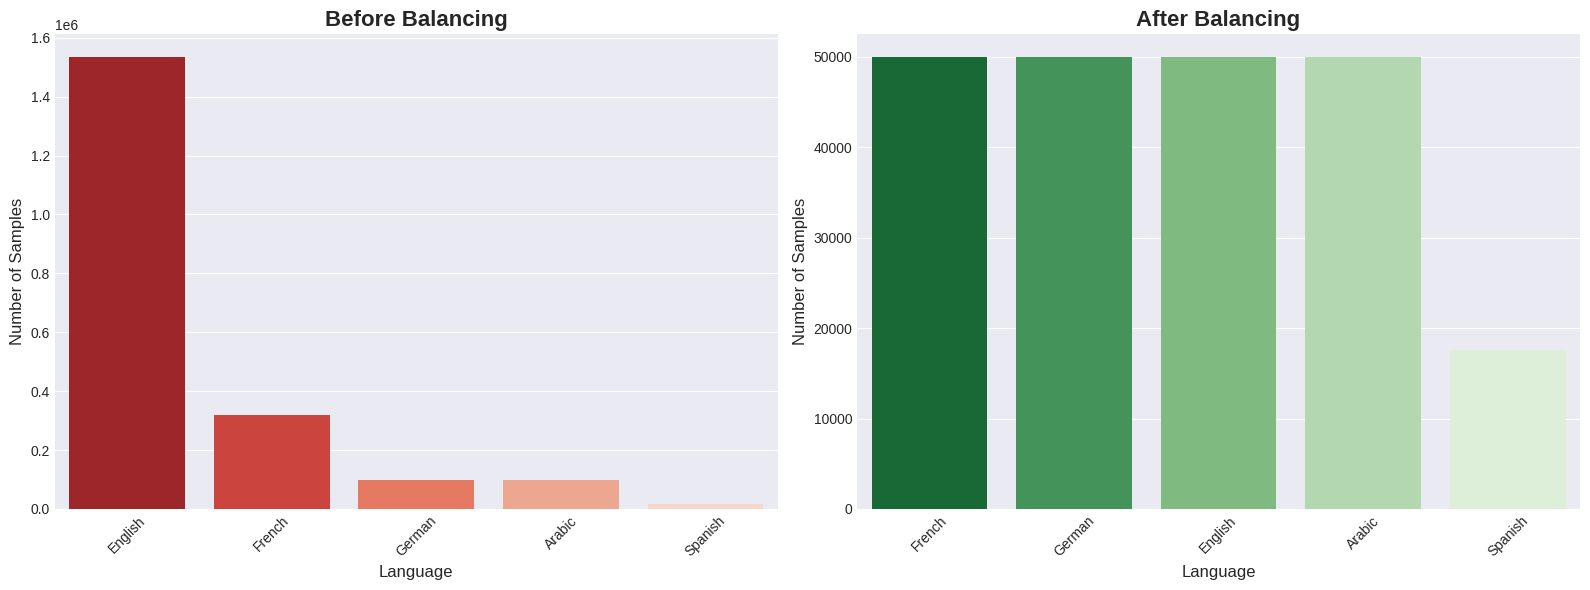


✅ Dataset has been balanced and updated!


In [ ]:
print("="*60)
print("BALANCING DATASET")
print("="*60)

# Original distribution
print("\n📊 Original Distribution:")
print(df[language_col].value_counts())

# Find the minimum class count (we'll use a reasonable sample size)
# Option 1: Use the second smallest class to preserve more data
# Option 2: Use a fixed number that's reasonable for all classes

# Let's use Spanish count * 5 to have reasonable samples
target_samples = min(50000, df[language_col].value_counts().min() * 3)
target_samples = max(target_samples, 15000)  # Ensure at least 15k per class

print(f"\n🎯 Target samples per language: {target_samples}")

# Balance the dataset
balanced_dfs = []
for language in df[language_col].unique():
    lang_df = df[df[language_col] == language]

    if len(lang_df) >= target_samples:
        # Undersample
        lang_df_balanced = lang_df.sample(n=target_samples, random_state=42)
    else:
        # Keep all samples if less than target
        lang_df_balanced = lang_df

    balanced_dfs.append(lang_df_balanced)

# Combine all balanced dataframes
df_balanced = pd.concat(balanced_dfs, ignore_index=True)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n✅ Balanced Distribution:")
print(df_balanced[language_col].value_counts())

print(f"\n📉 Dataset size change:")
print(f"   Original: {len(df):,} samples")
print(f"   Balanced: {len(df_balanced):,} samples")
print(f"   Reduction: {((len(df) - len(df_balanced))/len(df)*100):.2f}%")

# Visualize the balanced distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before balancing
language_counts_before = df[language_col].value_counts()
sns.barplot(x=language_counts_before.index, y=language_counts_before.values,
            palette='Reds_r', ax=axes[0])
axes[0].set_title('Before Balancing', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Language', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# After balancing
language_counts_after = df_balanced[language_col].value_counts()
sns.barplot(x=language_counts_after.index, y=language_counts_after.values,
            palette='Greens_r', ax=axes[1])
axes[1].set_title('After Balancing', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Language', fontsize=12)
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Update our main dataframe
df = df_balanced.copy()
print("\n✅ Dataset has been balanced and updated!")

## 📏 Text Length Statistics

Analyzing the length characteristics of text samples across different languages:
- **Character count distribution**: How long are the texts?
- **Word count distribution**: Average words per sample
- **Language-specific patterns**: Do some languages naturally have longer texts?
- **Outlier detection**: Identifying unusually short or long texts

Understanding text length helps in choosing appropriate preprocessing strategies and model parameters.

In [ ]:
text_col = 'Sentence'
print("="*60)
print("TEXT LENGTH ANALYSIS")
print("="*60)

# Calculate text lengths
df['char_count'] = df[text_col].astype(str).apply(len)
df['word_count'] = df[text_col].astype(str).apply(lambda x: len(x.split()))

# Overall statistics
print("\n📊 Overall Text Statistics:")
print("-" * 40)
print(f"Average characters per text: {df['char_count'].mean():.2f}")
print(f"Average words per text: {df['word_count'].mean():.2f}")
print(f"Median characters: {df['char_count'].median():.2f}")
print(f"Median words: {df['word_count'].median():.2f}")

# Statistics by language
print("\n📈 Statistics by Language:")
print("-" * 40)
length_stats = df.groupby(language_col).agg({
    'char_count': ['mean', 'median', 'min', 'max'],
    'word_count': ['mean', 'median', 'min', 'max']
}).round(2)
print(length_stats)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Character count distribution by language
for language in df[language_col].unique():
    lang_data = df[df[language_col] == language]['char_count']
    axes[0, 0].hist(lang_data, bins=50, alpha=0.6, label=language, edgecolor='black')
axes[0, 0].set_title('Character Count Distribution by Language', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Characters', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Word count distribution by language
for language in df[language_col].unique():
    lang_data = df[df[language_col] == language]['word_count']
    axes[0, 1].hist(lang_data, bins=50, alpha=0.6, label=language, edgecolor='black')
axes[0, 1].set_title('Word Count Distribution by Language', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Box plot for character count
df.boxplot(column='char_count', by=language_col, ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Character Count by Language (Box Plot)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Language', fontsize=11)
axes[1, 0].set_ylabel('Character Count', fontsize=11)
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# 4. Box plot for word count
df.boxplot(column='word_count', by=language_col, ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_title('Word Count by Language (Box Plot)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Language', fontsize=11)
axes[1, 1].set_ylabel('Word Count', fontsize=11)
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.suptitle('')  # Remove the default title
plt.tight_layout()
plt.show()

# Identify potential outliers
print("\n🔍 Potential Outliers:")
print("-" * 40)
print(f"Texts with < 10 characters: {(df['char_count'] < 10).sum()}")
print(f"Texts with < 3 words: {(df['word_count'] < 3).sum()}")
print(f"Texts with > 500 characters: {(df['char_count'] > 500).sum()}")

## 🧹 Text Preprocessing

Cleaning and preparing text data is crucial for ML model performance. We'll apply:

**Preprocessing Steps:**
1. **Lowercase conversion**: Standardize text case
2. **Remove URLs**: Strip web links
3. **Remove emails**: Remove email addresses
4. **Remove special characters**: Keep only letters and spaces (language-specific handling for Arabic)
5. **Remove extra whitespaces**: Clean spacing
6. **Remove very short texts**: Filter out texts with < 3 words (outliers)

**Note**: We'll preserve Arabic characters as they're essential for Arabic language detection.

In [ ]:
print("="*60)
print("TEXT PREPROCESSING")
print("="*60)

# Define preprocessing function
def preprocess_text(text):
    """
    Clean and preprocess text data
    """
    # Convert to string and lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove numbers (optional - you can keep them if needed)
    text = re.sub(r'\d+', '', text)

    # Keep only letters (including Arabic, accented characters) and spaces
    # This pattern keeps: a-z, A-Z, Arabic Unicode range, accented characters
    text = re.sub(r'[^a-zA-ZÀ-ÿ\u0600-\u06FF\s]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Show examples before preprocessing
print("\n📝 Examples BEFORE Preprocessing:")
print("-" * 40)
sample_texts = df.sample(5, random_state=42)
for idx, row in sample_texts.iterrows():
    print(f"\n{row[language_col]}: {row[text_col][:100]}...")

# Apply preprocessing
print("\n🔄 Applying preprocessing...")
df['cleaned_text'] = df[text_col].apply(preprocess_text)

# Recalculate text lengths after cleaning
df['cleaned_char_count'] = df['cleaned_text'].apply(len)
df['cleaned_word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Show examples after preprocessing
print("\n✨ Examples AFTER Preprocessing:")
print("-" * 40)
for idx, row in sample_texts.iterrows():
    original_text = df.loc[idx, text_col]
    cleaned_text = df.loc[idx, 'cleaned_text']
    print(f"\n{df.loc[idx, language_col]}:")
    print(f"  Before: {original_text[:80]}...")
    print(f"  After:  {cleaned_text[:80]}...")

# Remove very short texts (less than 3 words after cleaning)
print("\n🗑️ Removing very short texts (< 3 words)...")
original_len = len(df)
df = df[df['cleaned_word_count'] >= 3].reset_index(drop=True)
removed = original_len - len(df)
print(f"   Removed {removed} samples ({(removed/original_len*100):.2f}%)")
print(f"   Remaining samples: {len(df):,}")

# Check for empty texts after cleaning
empty_texts = df['cleaned_text'].str.strip().eq('').sum()
if empty_texts > 0:
    print(f"\n⚠️ Found {empty_texts} empty texts after cleaning. Removing them...")
    df = df[df['cleaned_text'].str.strip() != ''].reset_index(drop=True)
    print(f"   Final sample count: {len(df):,}")

print("\n✅ Preprocessing completed!")

TEXT PREPROCESSING

📝 Examples BEFORE Preprocessing:
----------------------------------------

English: Built as the imperial capital of India by the British, the spacious New Delhi could not be more diff...

German: Ab 14 Uhr regelt in Höhe der Neuen Roßbrücke eine Baustellenampel den Verkehr....

German: Aktien»Nachrichten»ADIDAS AKTIE»adidas-Aktie: Aktuelles Umfeld nicht gerade förderlich!...

French: californie est parfois doux en octobre, et il est jamais le gel à l' automne....

German: Aber nur noch darüber, wohin der Prince am Ende wechseln wird.....

🔄 Applying preprocessing...

✨ Examples AFTER Preprocessing:
----------------------------------------

English:
  Before: Built as the imperial capital of India by the British, the spacious New Delhi co...
  After:  built as the imperial capital of india by the british the spacious new delhi cou...

German:
  Before: Ab 14 Uhr regelt in Höhe der Neuen Roßbrücke eine Baustellenampel den Verkehr....
  After:  ab uhr regelt in höhe d

## 📊 Preprocessing Impact Visualization # مرحله تقييم مش اكتر عشان اشوف النصوص بعد وقبل التنضيف مش بسن انضف


Comparing text statistics before and after preprocessing:
- Character count changes
- Word count changes
- Distribution shifts per language
- Final dataset summary

This helps us understand how preprocessing affected our data.

PREPROCESSING IMPACT ANALYSIS

📊 Character Count Comparison:
----------------------------------------
Before: Mean = 145.27, Median = 89.00
After:  Mean = 140.57, Median = 86.00

📊 Word Count Comparison:
----------------------------------------
Before: Mean = 24.93, Median = 15.00
After:  Mean = 24.56, Median = 15.00

🌍 Final Language Distribution:
----------------------------------------
Language
German     49969
English    49912
French     49504
Arabic     49482
Spanish    17524
Name: count, dtype: int64


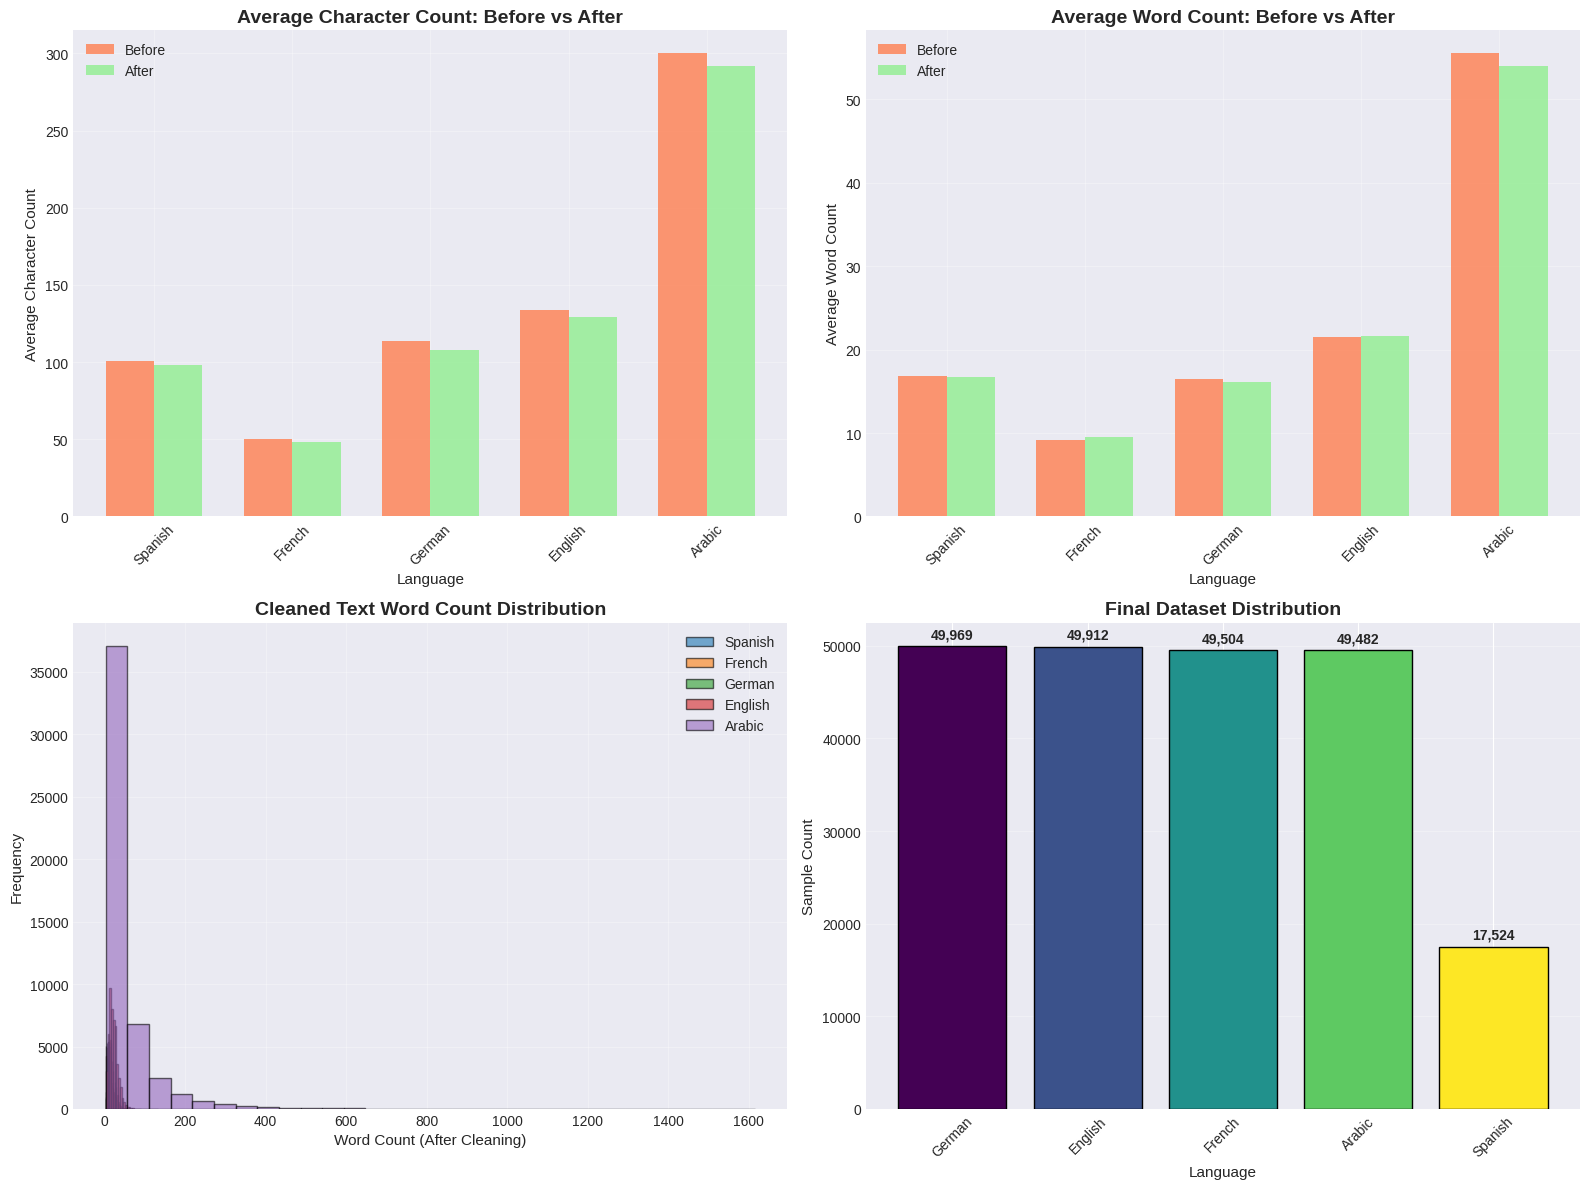


✅ Preprocessing impact analysis completed!


In [ ]:
print("="*60)
print("PREPROCESSING IMPACT ANALYSIS")
print("="*60)

# Compare statistics before and after
print("\n📊 Character Count Comparison:")
print("-" * 40)
print(f"Before: Mean = {df['char_count'].mean():.2f}, Median = {df['char_count'].median():.2f}")
print(f"After:  Mean = {df['cleaned_char_count'].mean():.2f}, Median = {df['cleaned_char_count'].median():.2f}")

print("\n📊 Word Count Comparison:")
print("-" * 40)
print(f"Before: Mean = {df['word_count'].mean():.2f}, Median = {df['word_count'].median():.2f}")
print(f"After:  Mean = {df['cleaned_word_count'].mean():.2f}, Median = {df['cleaned_word_count'].median():.2f}")

# Language distribution after preprocessing
print("\n🌍 Final Language Distribution:")
print("-" * 40)
print(df[language_col].value_counts())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Character count comparison
languages = df[language_col].unique()
x = np.arange(len(languages))
width = 0.35

before_chars = [df[df[language_col] == lang]['char_count'].mean() for lang in languages]
after_chars = [df[df[language_col] == lang]['cleaned_char_count'].mean() for lang in languages]

axes[0, 0].bar(x - width/2, before_chars, width, label='Before', alpha=0.8, color='coral')
axes[0, 0].bar(x + width/2, after_chars, width, label='After', alpha=0.8, color='lightgreen')
axes[0, 0].set_xlabel('Language', fontsize=11)
axes[0, 0].set_ylabel('Average Character Count', fontsize=11)
axes[0, 0].set_title('Average Character Count: Before vs After', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(languages, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Word count comparison
before_words = [df[df[language_col] == lang]['word_count'].mean() for lang in languages]
after_words = [df[df[language_col] == lang]['cleaned_word_count'].mean() for lang in languages]

axes[0, 1].bar(x - width/2, before_words, width, label='Before', alpha=0.8, color='coral')
axes[0, 1].bar(x + width/2, after_words, width, label='After', alpha=0.8, color='lightgreen')
axes[0, 1].set_xlabel('Language', fontsize=11)
axes[0, 1].set_ylabel('Average Word Count', fontsize=11)
axes[0, 1].set_title('Average Word Count: Before vs After', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(languages, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of cleaned text lengths
for language in languages:
    lang_data = df[df[language_col] == language]['cleaned_word_count']
    axes[1, 0].hist(lang_data, bins=30, alpha=0.6, label=language, edgecolor='black')
axes[1, 0].set_xlabel('Word Count (After Cleaning)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Cleaned Text Word Count Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Final language distribution
lang_counts = df[language_col].value_counts()
colors_final = plt.cm.viridis(np.linspace(0, 1, len(lang_counts)))
axes[1, 1].bar(lang_counts.index, lang_counts.values, color=colors_final, edgecolor='black')
axes[1, 1].set_xlabel('Language', fontsize=11)
axes[1, 1].set_ylabel('Sample Count', fontsize=11)
axes[1, 1].set_title('Final Dataset Distribution', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(lang_counts.values):
    axes[1, 1].text(i, v + max(lang_counts.values)*0.01, f'{v:,}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Preprocessing impact analysis completed!")

 ## 🔤 Character-Level Feature Analysis  
 ##حسبت كمان الحروف اللي مميزة لكل لغة ومش موجودة في باقي اللغات، وعدد الحروف الفريدة، وده يوضّح إن كل لغة لها signature من الحروف، وده نفس الفكرة اللي الموديل بيعتمد عليها لما نستخدم TF-IDF character n-grams﻿ للتمييز بين اللغات.”


Exploring unique character patterns in each language:
- **Unique characters per language**: What makes each language distinctive?
- **Character frequency analysis**: Most common characters
- **Language-specific characters**: Identifying unique markers (e.g., Arabic script, German umlauts, French accents)

Character patterns are powerful features for language detection!

CHARACTER-LEVEL ANALYSIS

📝 Unique Character Analysis by Language:
------------------------------------------------------------

Arabic:
  Total unique characters: 39
  Sample characters: ، ؛ ؟ ء آ أ ؤ إ ئ ا ب ة ت ث ج ح خ د ذ ر ز س ش ص ض ط ظ ع غ ف ق ك ل م ن ه و ى ي
  Top 15 characters: ا(1788713), ل(1274507), ي(844817), م(716079), و(623722), ن(616560), ت(555216), ر(517791), ب(449299), ه(416303), ع(382766), ف(347000), د(343537), ك(317440), ة(308483)

English:
  Total unique characters: 67
  Sample characters: a b c d e f g h i j k l m n o p q r s t u v w x y z × ß à á â ã ä æ ç è é ê ë í î ï ñ ò ó ô õ ö ø ù
  Top 15 characters: e(661053), t(493991), a(451091), i(418159), o(410994), n(400448), s(373196), r(352286), h(234027), l(226738), d(202243), c(202114), u(152702), m(137802), p(123806)

French:
  Total unique characters: 39
  Sample characters: a b c d e f g h i j k l m n o p q r s t u v w x y z à á â ç è é ê ë î ï ô ù û
  Top 15 characters: e(293067), s(173657), a(167898), i(159058)

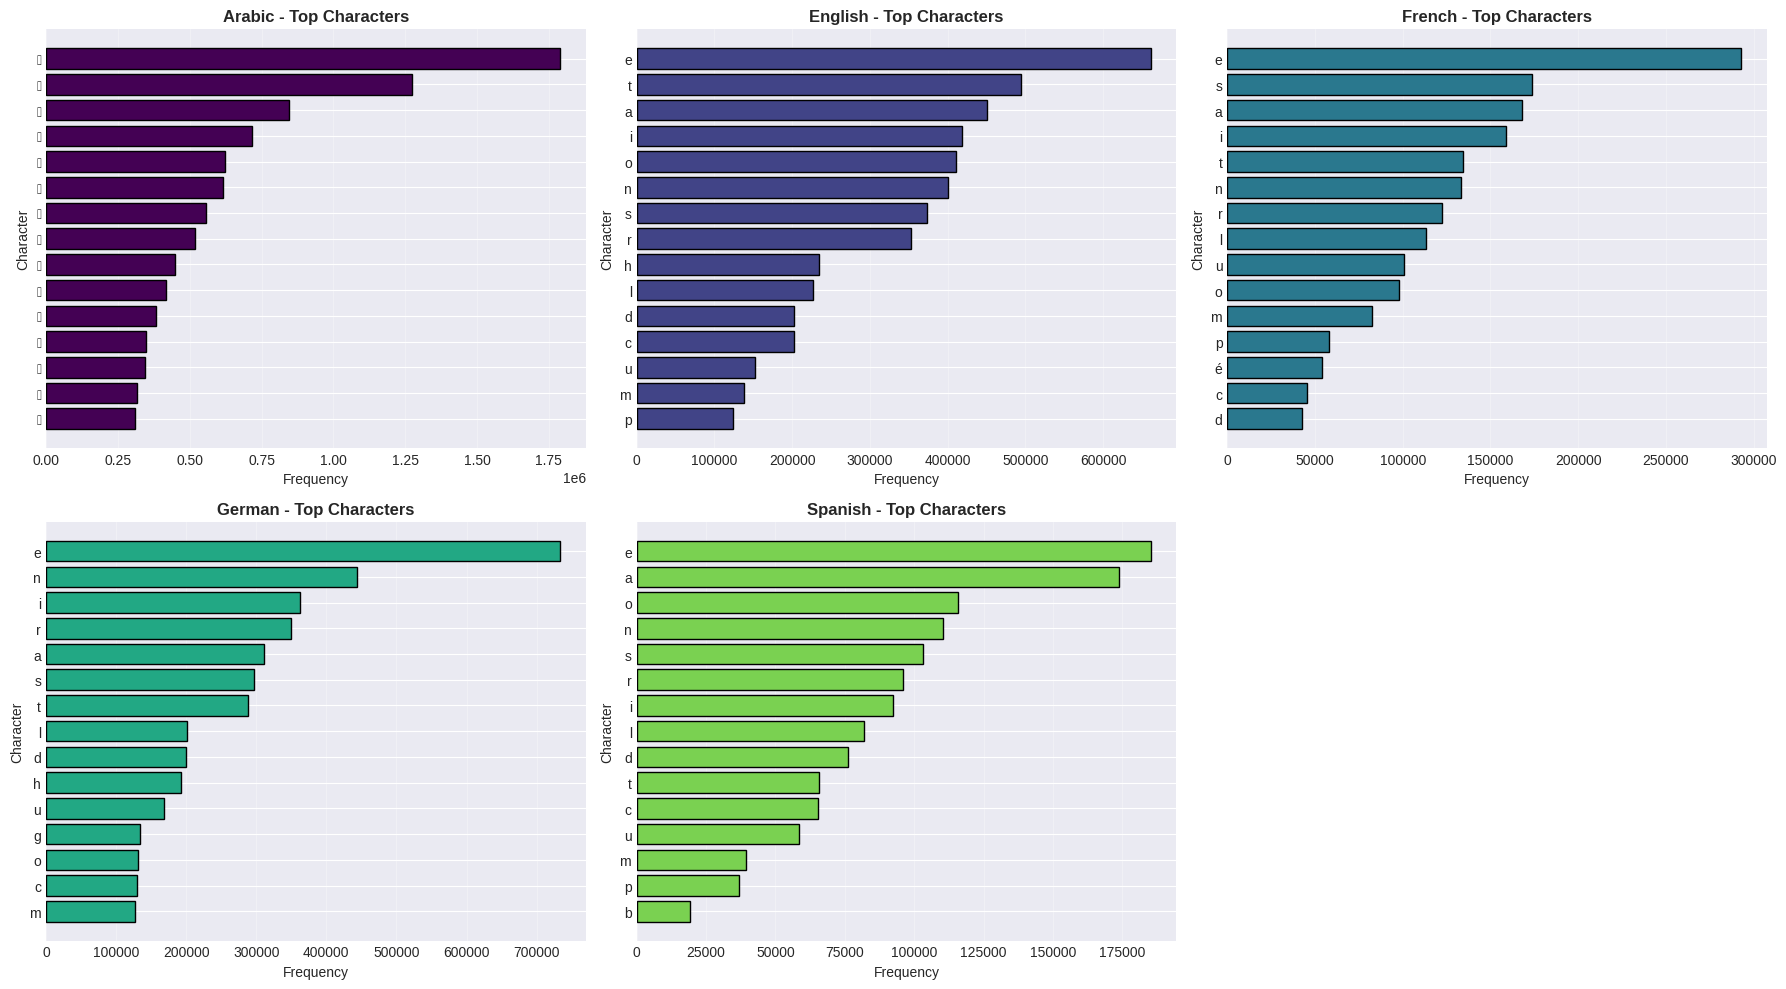


🎯 Language-Specific Character Markers:
------------------------------------------------------------

Arabic:
  Unique characters: ، ؛ ؟ ء آ أ ؤ إ ئ ة ث ج خ د ذ ر ز ش ص ض ط ظ غ ف ق ك م ي
  Total unique to this language: 28

English:
  Unique characters: þ ÿ
  Total unique to this language: 2

French:
  No characters unique to this language only

German:
  Unique characters: å
  Total unique to this language: 1

Spanish:
  No characters unique to this language only

📊 Character Diversity Comparison:
------------------------------------------------------------
English        :  67 unique characters
German         :  53 unique characters
Arabic         :  39 unique characters
French         :  39 unique characters
Spanish        :  39 unique characters

✅ Character-level analysis completed!


In [ ]:
print("="*60)
print("CHARACTER-LEVEL ANALYSIS")
print("="*60)

# Function to get unique characters
def get_unique_chars(texts):
    """Get all unique characters from a list of texts"""
    all_chars = ''.join(texts)
    return set(all_chars)

# Function to get most common characters
def get_top_chars(texts, n=10):
    """Get top N most common characters"""
    all_chars = ''.join(texts)
    char_counts = Counter(all_chars)
    # Remove space from the count
    if ' ' in char_counts:
        del char_counts[' ']
    return char_counts.most_common(n)

# Analyze each language
print("\n📝 Unique Character Analysis by Language:")
print("-" * 60)

language_char_data = {}

for language in sorted(df[language_col].unique()):
    lang_texts = df[df[language_col] == language]['cleaned_text'].tolist()

    # Get unique characters
    unique_chars = get_unique_chars(lang_texts)
    unique_chars.discard(' ')  # Remove space

    # Get top characters
    top_chars = get_top_chars(lang_texts, n=15)

    # Store data
    language_char_data[language] = {
        'unique_chars': unique_chars,
        'top_chars': top_chars,
        'total_unique': len(unique_chars)
    }

    print(f"\n{language}:")
    print(f"  Total unique characters: {len(unique_chars)}")
    print(f"  Sample characters: {' '.join(sorted(list(unique_chars))[:50])}")
    print(f"  Top 15 characters: {', '.join([f'{char}({count})' for char, count in top_chars])}")

# Visualize top characters for each language
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, language in enumerate(sorted(df[language_col].unique())):
    top_chars = language_char_data[language]['top_chars']
    chars = [item[0] for item in top_chars]
    counts = [item[1] for item in top_chars]

    axes[idx].barh(chars, counts, color=plt.cm.viridis(idx/5), edgecolor='black')
    axes[idx].set_xlabel('Frequency', fontsize=10)
    axes[idx].set_ylabel('Character', fontsize=10)
    axes[idx].set_title(f'{language} - Top Characters', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Find language-specific characters
print("\n🎯 Language-Specific Character Markers:")
print("-" * 60)

all_chars_by_lang = {lang: data['unique_chars']
                     for lang, data in language_char_data.items()}

for language in sorted(df[language_col].unique()):
    lang_chars = all_chars_by_lang[language]
    other_langs_chars = set()

    for other_lang, other_chars in all_chars_by_lang.items():
        if other_lang != language:
            other_langs_chars.update(other_chars)

    unique_to_lang = lang_chars - other_langs_chars

    print(f"\n{language}:")
    if unique_to_lang:
        unique_list = sorted(list(unique_to_lang))[:30]
        print(f"  Unique characters: {' '.join(unique_list)}")
        print(f"  Total unique to this language: {len(unique_to_lang)}")
    else:
        print(f"  No characters unique to this language only")

# Character diversity comparison
print("\n📊 Character Diversity Comparison:")
print("-" * 60)
diversity_data = [(lang, data['total_unique'])
                  for lang, data in language_char_data.items()]
diversity_data.sort(key=lambda x: x[1], reverse=True)

for lang, count in diversity_data:
    print(f"{lang:15s}: {count:3d} unique characters")

print("\n✅ Character-level analysis completed!")

## 📝 Word-Level Analysis

Analyzing the most frequent words in each language:
- **Top words per language**: Understanding vocabulary patterns
- **Word length distribution**: Do languages differ in average word length?
- **Vocabulary size**: How many unique words per language?

Note: We're not removing stopwords intentionally, as common words like "the", "de", "der" are actually great features for language detection!

WORD-LEVEL ANALYSIS

📚 Word Statistics by Language:
------------------------------------------------------------

Arabic:
  Vocabulary size: 228,346 unique words
  Average word length: 4.43 characters
  Top 20 words: من(62984), في(58569), و(48119), على(23688), لا(23390), أن(18716), عن(18061), ما(17947), ،(16705), جدا(16432), لم(14414), ان(13456), كل(12282), الكتاب(12217), كان(11891), الرواية(11860), هذا(11247), فى(11237), التي(9902), مع(9181)

English:
  Vocabulary size: 49,712 unique words
  Average word length: 5.04 characters
  Top 20 words: the(69431), of(38682), and(34785), to(30970), in(23719), a(23351), is(14198), that(11480), for(10529), as(7721), are(7595), s(7485), with(7032), it(6973), on(6864), by(5976), or(5628), be(5590), from(5139), this(4707)

French:
  Vocabulary size: 11,641 unique words
  Average word length: 4.22 characters
  Top 20 words: est(35580), en(18415), il(16350), la(11025), mais(10345), l(9059), et(8577), le(8568), de(8411), les(8350), je(7585), jamais(621

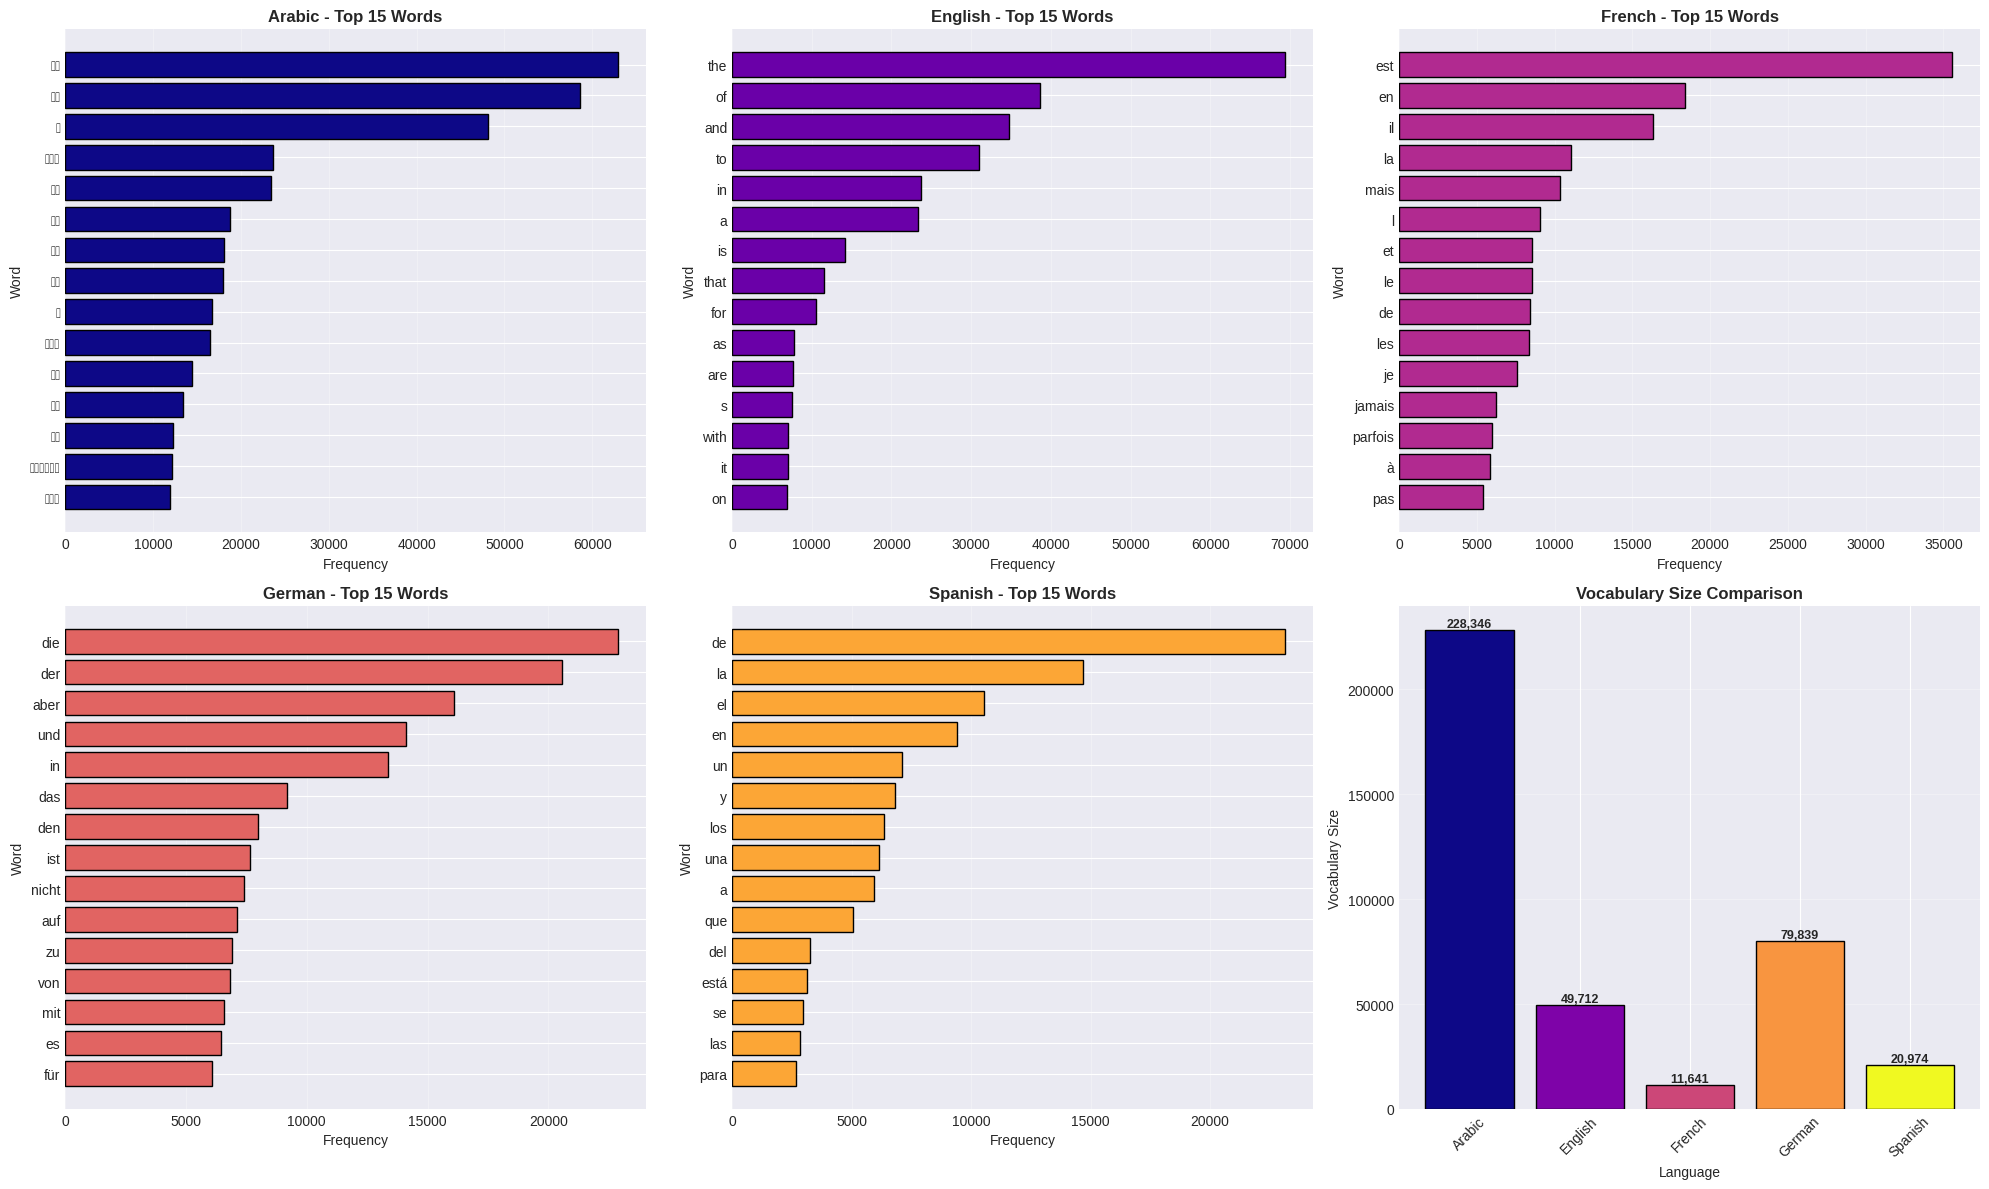


📏 Average Word Length Comparison:
------------------------------------------------------------
Arabic         : 4.43 characters
English        : 5.04 characters
French         : 4.22 characters
German         : 5.76 characters
Spanish        : 4.93 characters

✅ Word-level analysis completed!


In [ ]:
print("="*60)
print("WORD-LEVEL ANALYSIS")
print("="*60)

# Function to get top words
def get_top_words(texts, n=20):
    """Get top N most common words"""
    all_words = []
    for text in texts:
        all_words.extend(text.split())
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Function to get vocabulary size
def get_vocab_size(texts):
    """Get total unique words"""
    all_words = set()
    for text in texts:
        all_words.update(text.split())
    return len(all_words)

print("\n📚 Word Statistics by Language:")
print("-" * 60)

word_data = {}

for language in sorted(df[language_col].unique()):
    lang_texts = df[df[language_col] == language]['cleaned_text'].tolist()

    # Get top words
    top_words = get_top_words(lang_texts, n=20)

    # Get vocabulary size
    vocab_size = get_vocab_size(lang_texts)

    # Calculate average word length
    all_words = ' '.join(lang_texts).split()
    avg_word_len = np.mean([len(word) for word in all_words])

    word_data[language] = {
        'top_words': top_words,
        'vocab_size': vocab_size,
        'avg_word_length': avg_word_len
    }

    print(f"\n{language}:")
    print(f"  Vocabulary size: {vocab_size:,} unique words")
    print(f"  Average word length: {avg_word_len:.2f} characters")
    print(f"  Top 20 words: {', '.join([f'{word}({count})' for word, count in top_words[:20]])}")

# Visualize top words for each language
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, language in enumerate(sorted(df[language_col].unique())):
    top_words = word_data[language]['top_words'][:15]
    words = [item[0] for item in top_words]
    counts = [item[1] for item in top_words]

    axes[idx].barh(words, counts, color=plt.cm.plasma(idx/5), edgecolor='black')
    axes[idx].set_xlabel('Frequency', fontsize=10)
    axes[idx].set_ylabel('Word', fontsize=10)
    axes[idx].set_title(f'{language} - Top 15 Words', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')

# Vocabulary size comparison
vocab_sizes = [word_data[lang]['vocab_size'] for lang in sorted(df[language_col].unique())]
axes[5].bar(sorted(df[language_col].unique()), vocab_sizes,
           color=plt.cm.plasma(np.linspace(0, 1, 5)), edgecolor='black')
axes[5].set_xlabel('Language', fontsize=10)
axes[5].set_ylabel('Vocabulary Size', fontsize=10)
axes[5].set_title('Vocabulary Size Comparison', fontsize=12, fontweight='bold')
axes[5].tick_params(axis='x', rotation=45)
for i, v in enumerate(vocab_sizes):
    axes[5].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
axes[5].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Average word length comparison
print("\n📏 Average Word Length Comparison:")
print("-" * 60)
for lang in sorted(df[language_col].unique()):
    print(f"{lang:15s}: {word_data[lang]['avg_word_length']:.2f} characters")

print("\n✅ Word-level analysis completed!")


## 🔧 Detecting Character Anomalies
## عرّفت مجموعة حروف متوقعة لكل لغة، وبعدين حسبت لكل عينة نسبة الحروف الموافقة للغة. الجمل اللي فيها نسبة حروف غريبة (mix لغات أو رموز غريبة) بتظهر كـ low purity samples، وبعرض أمثلة منها.”​

“لو نسبة العينات اللي purity بتاعها أقل من 90٪ عالية، ده معناه إن فيه تلوث لغوي محتاج معالجة إضافية، ولو قليلة بطبع إن Character purity is excellent﻿ والداتا نظيفة.”


Since we noticed some character cross-contamination (e.g., Spanish/German characters in English texts), let's:
- **Detect samples with unexpected characters**: Find texts that contain characters not typical for their labeled language
- **Analyze the extent**: How many samples are affected?
- **Decision**: Filter out highly suspicious samples or keep them (as real-world data is messy)

This helps improve data quality and model performance.

CHARACTER ANOMALY DETECTION

🔍 Analyzing character purity for each sample...

📊 Character Purity Statistics by Language:
------------------------------------------------------------

Arabic:
  Average purity: 99.70%
  Median purity: 100.00%
  Samples with <90% purity: 25 (0.05%)

English:
  Average purity: 99.99%
  Median purity: 100.00%
  Samples with <90% purity: 1 (0.00%)

French:
  Average purity: 100.00%
  Median purity: 100.00%
  Samples with <90% purity: 0 (0.00%)

German:
  Average purity: 99.99%
  Median purity: 100.00%
  Samples with <90% purity: 0 (0.00%)

Spanish:
  Average purity: 100.00%
  Median purity: 100.00%
  Samples with <90% purity: 0 (0.00%)


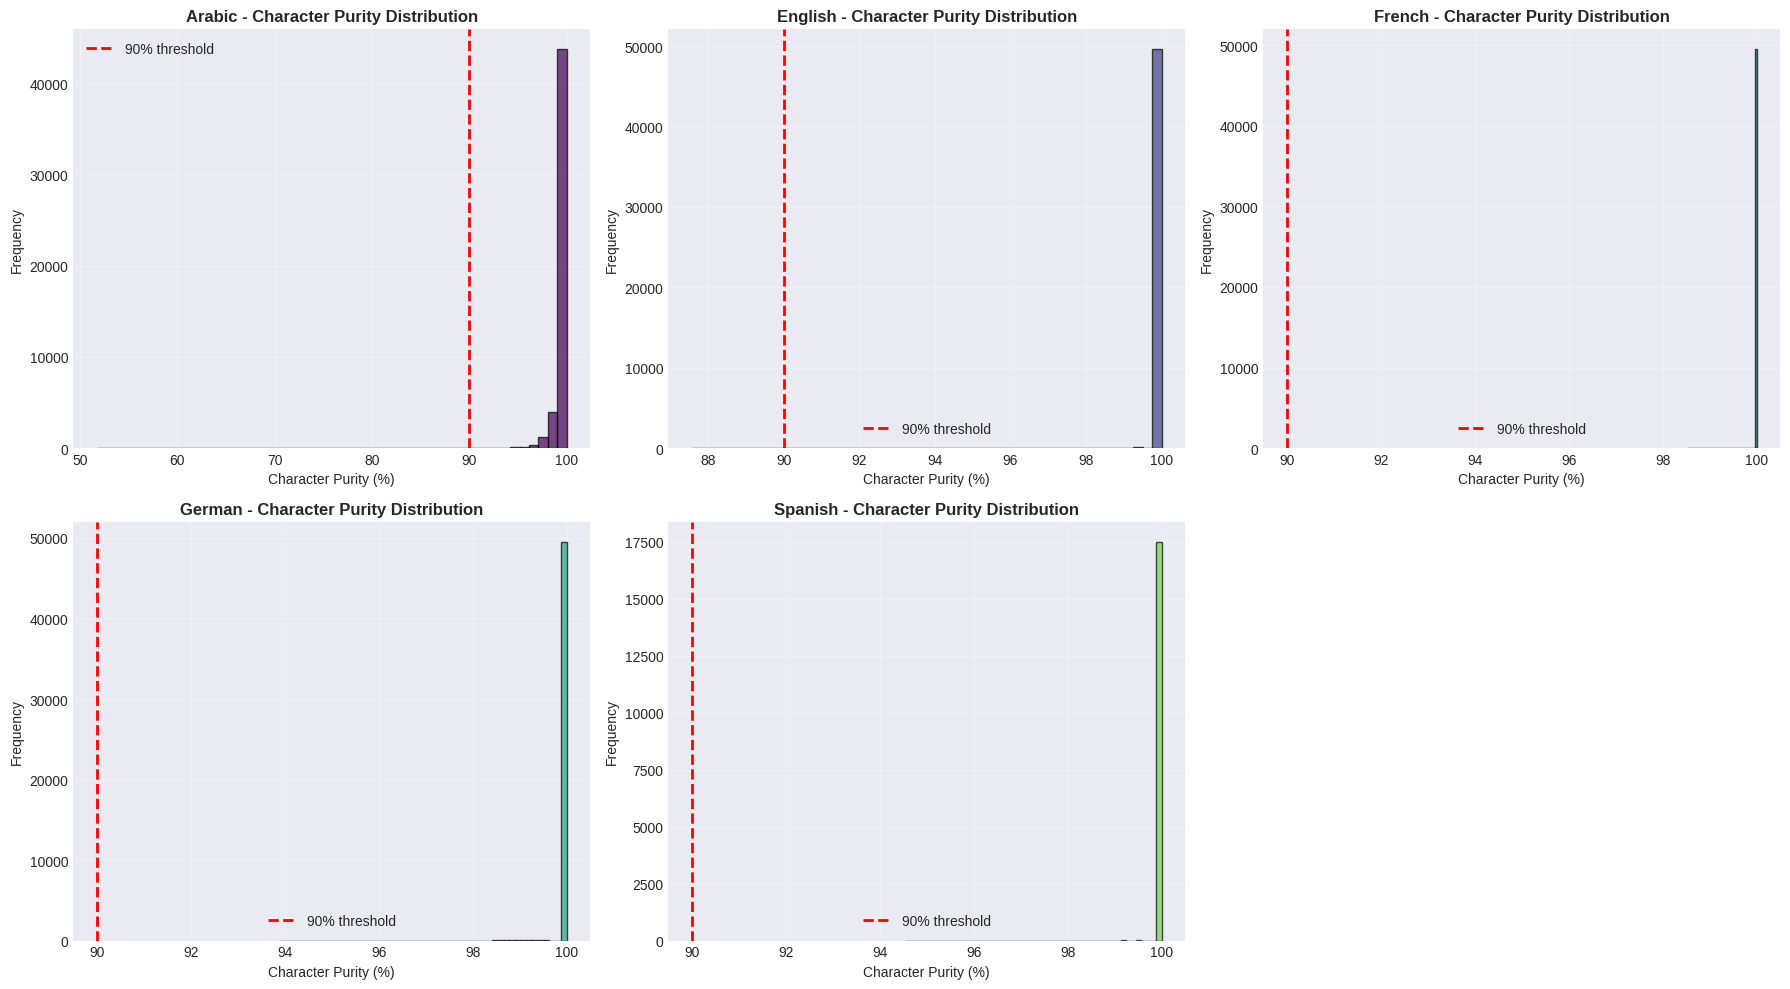


⚠️ Examples of Low Purity Samples (<80%):
------------------------------------------------------------

Language: Arabic | Purity: 60.5%
Text: سلعة رديئة للغاية وندمت اشد الندم اني اشترتها وانصح بعدم اقتناء هذه السلعة ؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟...

Language: Arabic | Purity: 71.4%
Text: ؟؟؟؟ هدؤ نظافه...

Language: Arabic | Purity: 73.0%
Text: ف ر ا ، ه ل د ك ، ا ، ، ، ، ، ا ، ، ،...

Language: Arabic | Purity: 51.7%
Text: ، ، ؛ ، ، ، ، ، ، ، ؟ ، ، ، ة...

Language: Arabic | Purity: 78.6%
Text: أين المغزى ؟؟؟...

🎯 Assessment:
------------------------------------------------------------
Total samples with <90% purity: 26 (0.01%)

✅ Character purity is excellent! Data quality is very good.

✅ Character anomaly detection completed!


In [ ]:
print("="*60)
print("CHARACTER ANOMALY DETECTION")
print("="*60)

# Define expected character sets for each language
language_char_sets = {
    'English': set('abcdefghijklmnopqrstuvwxyz '),
    'Spanish': set('abcdefghijklmnopqrstuvwxyzáéíóúüñ '),
    'French': set('abcdefghijklmnopqrstuvwxyzàâæçéèêëïîôùûü '),
    'German': set('abcdefghijklmnopqrstuvwxyzäöüß '),
    'Arabic': set('ابتثجحخدذرزسشصضطظعغفقكلمنهويءآأؤإئةى ')
}

def calculate_char_purity(text, expected_chars):
    """Calculate percentage of characters that match expected set"""
    text = text.lower().strip()
    if len(text) == 0:
        return 0

    valid_chars = sum(1 for char in text if char in expected_chars)
    return (valid_chars / len(text)) * 100

# Analyze each sample
print("\n🔍 Analyzing character purity for each sample...")
df['char_purity'] = df.apply(
    lambda row: calculate_char_purity(
        row['cleaned_text'],
        language_char_sets.get(row[language_col], set())
    ),
    axis=1
)

# Statistics by language
print("\n📊 Character Purity Statistics by Language:")
print("-" * 60)
for language in sorted(df[language_col].unique()):
    lang_df = df[df[language_col] == language]
    mean_purity = lang_df['char_purity'].mean()
    median_purity = lang_df['char_purity'].median()
    low_purity = (lang_df['char_purity'] < 90).sum()

    print(f"\n{language}:")
    print(f"  Average purity: {mean_purity:.2f}%")
    print(f"  Median purity: {median_purity:.2f}%")
    print(f"  Samples with <90% purity: {low_purity} ({low_purity/len(lang_df)*100:.2f}%)")

# Visualize purity distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, language in enumerate(sorted(df[language_col].unique())):
    lang_data = df[df[language_col] == language]['char_purity']

    axes[idx].hist(lang_data, bins=50, color=plt.cm.viridis(idx/5),
                   edgecolor='black', alpha=0.7)
    axes[idx].axvline(90, color='red', linestyle='--', linewidth=2, label='90% threshold')
    axes[idx].set_xlabel('Character Purity (%)', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'{language} - Character Purity Distribution',
                       fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

axes[5].axis('off')
plt.tight_layout()
plt.show()

# Show examples of low purity samples
print("\n⚠️ Examples of Low Purity Samples (<80%):")
print("-" * 60)
low_purity_df = df[df['char_purity'] < 80]
if len(low_purity_df) > 0:
    low_purity_samples = low_purity_df.sample(min(5, len(low_purity_df)), random_state=42)
    for idx, row in low_purity_samples.iterrows():
        print(f"\nLanguage: {row[language_col]} | Purity: {row['char_purity']:.1f}%")
        print(f"Text: {row['cleaned_text'][:100]}...")
else:
    print("   None found - data quality is excellent!")

# Decision point
print("\n🎯 Assessment:")
print("-" * 60)
total_low_purity = (df['char_purity'] < 90).sum()
print(f"Total samples with <90% purity: {total_low_purity} ({total_low_purity/len(df)*100:.2f}%)")

if total_low_purity / len(df) > 0.1:
    print("\n⚠️ Significant character contamination detected!")
else:
    print("\n✅ Character purity is excellent! Data quality is very good.")

print("\n✅ Character anomaly detection completed!")

## 🗑️ Removing Low Quality Samples

Since we identified 26 samples with <90% character purity (mostly Arabic texts filled with repeated punctuation), we'll remove them to improve data quality.

These are likely spam or corrupted entries that won't help our model learn.

In [ ]:
print("="*60)
print("REMOVING LOW QUALITY SAMPLES")
print("="*60)

# Show current dataset size
print(f"\n📊 Current dataset size: {len(df):,} samples")

# Count samples to be removed
low_quality = df[df['char_purity'] < 90]
print(f"   Samples with <90% purity: {len(low_quality)}")

# Remove low purity samples
df_clean = df[df['char_purity'] >= 90].copy()
df_clean = df_clean.reset_index(drop=True)

print(f"\n✅ Cleaned dataset size: {len(df_clean):,} samples")
print(f"   Removed: {len(df) - len(df_clean)} samples ({(len(df) - len(df_clean))/len(df)*100:.3f}%)")

# Update language distribution
print("\n🌍 Final Language Distribution After Cleaning:")
print("-" * 60)
final_dist = df_clean[language_col].value_counts()
for lang, count in final_dist.items():
    print(f"   {lang:15s}: {count:,}")

# Update the main dataframe
df = df_clean.copy()

print("\n✅ Low quality samples removed successfully!")

REMOVING LOW QUALITY SAMPLES

📊 Current dataset size: 216,391 samples
   Samples with <90% purity: 26

✅ Cleaned dataset size: 216,365 samples
   Removed: 26 samples (0.012%)

🌍 Final Language Distribution After Cleaning:
------------------------------------------------------------
   German         : 49,969
   English        : 49,911
   French         : 49,504
   Arabic         : 49,457
   Spanish        : 17,524

✅ Low quality samples removed successfully!


## 🔀 Train-Test Split

Splitting our cleaned dataset into training and testing sets:
- **Training set (80%)**: Used to train the models
- **Testing set (20%)**: Used to evaluate model performance on unseen data
- **Stratified split**: Ensures each language is proportionally represented in both sets

This prevents overfitting and gives us realistic performance metrics.

TRAIN-TEST SPLIT

📊 Total samples: 216,365
   Number of languages: 5
   Languages: Arabic, English, French, German, Spanish

✅ Data split completed!

📈 Training set: 173,092 samples (80.0%)
📉 Testing set:  43,273 samples (20.0%)

🔍 Language Distribution in Training Set:
----------------------------------------
   Arabic         : 39,566 (22.86%)
   English        : 39,929 (23.07%)
   French         : 39,603 (22.88%)
   German         : 39,975 (23.09%)
   Spanish        : 14,019 (8.10%)

🔍 Language Distribution in Testing Set:
----------------------------------------
   Arabic         : 9,891 (22.86%)
   English        : 9,982 (23.07%)
   French         : 9,901 (22.88%)
   German         : 9,994 (23.10%)
   Spanish        : 3,505 (8.10%)


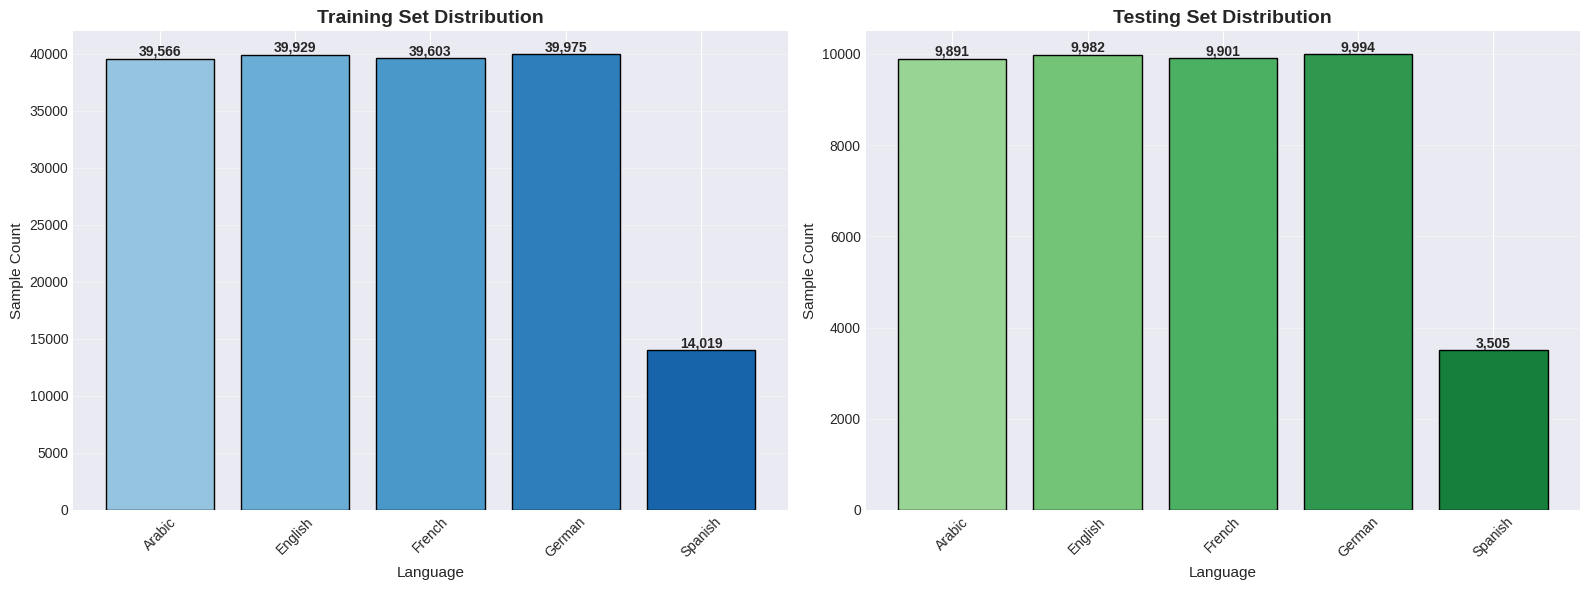


✅ Train-test split visualization completed!


In [ ]:
print("="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

# Prepare features (X) and labels (y)
X = df['cleaned_text'].values
y = df[language_col].values

print(f"\n📊 Total samples: {len(X):,}")
print(f"   Number of languages: {len(np.unique(y))}")
print(f"   Languages: {', '.join(sorted(np.unique(y)))}")

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensures balanced distribution in both sets
)

print(f"\n✅ Data split completed!")
print(f"\n📈 Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"📉 Testing set:  {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

# Check distribution in train and test sets
print("\n🔍 Language Distribution in Training Set:")
print("-" * 40)
train_dist = pd.Series(y_train).value_counts().sort_index()
for lang, count in train_dist.items():
    print(f"   {lang:15s}: {count:,} ({count/len(y_train)*100:.2f}%)")

print("\n🔍 Language Distribution in Testing Set:")
print("-" * 40)
test_dist = pd.Series(y_test).value_counts().sort_index()
for lang, count in test_dist.items():
    print(f"   {lang:15s}: {count:,} ({count/len(y_test)*100:.2f}%)")

# Visualize the split
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set distribution
axes[0].bar(train_dist.index, train_dist.values,
           color=plt.cm.Blues(np.linspace(0.4, 0.8, len(train_dist))),
           edgecolor='black')
axes[0].set_title('Training Set Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Language', fontsize=11)
axes[0].set_ylabel('Sample Count', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(train_dist.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# Testing set distribution
axes[1].bar(test_dist.index, test_dist.values,
           color=plt.cm.Greens(np.linspace(0.4, 0.8, len(test_dist))),
           edgecolor='black')
axes[1].set_title('Testing Set Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Language', fontsize=11)
axes[1].set_ylabel('Sample Count', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(test_dist.values):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Train-test split visualization completed!")

## 🔢 Feature Engineering: TF-IDF Vectorization

Converting text into numerical features using **TF-IDF (Term Frequency-Inverse Document Frequency)**:

**What is TF-IDF?**
- **TF (Term Frequency)**: How often a word appears in a document
- **IDF (Inverse Document Frequency)**: How unique/rare a word is across all documents
- **TF-IDF Score**: TF × IDF - gives higher weight to important, distinctive words

**Our Configuration:**
- **Character n-grams (1-3)**: Captures character patterns (great for languages!)
- **Max features**: 5000 most important features
- **Sublinear TF**: Logarithmic term frequency scaling

Character n-grams work excellently for language detection because different languages have unique character patterns!

TF-IDF FEATURE EXTRACTION

🔧 Initializing TF-IDF Vectorizer...
   Analyzer: character
   N-gram range: (1, 3)
   Max features: 5000
   Sublinear TF: True

⚙️ Fitting vectorizer on training data...
✅ Transforming test data...

📊 Feature Matrix Shapes:
----------------------------------------
   Training set: 173,092 samples × 5,000 features
   Testing set:  43,273 samples × 5,000 features

🔤 Sample Features (Character N-grams):
----------------------------------------
   First 20: [' ', ' a', ' a ', ' ab', ' ac', ' ad', ' af', ' ag', ' ai', ' ak', ' al', ' am', ' an', ' ap', ' ar', ' as', ' at', ' au', ' av', ' b']
   Last 20:  ['يما', 'يمة', 'يمك', 'ين', 'ين ', 'ينا', 'ينة', 'ينه', 'يني', 'يه', 'يه ', 'يها', 'يهم', 'يو', 'يوج', 'يوم', 'يون', 'يي', 'يين', 'ييي']
   Random 20: ['l m', 'wie', 'zt ', 'err', 'bac', ' ko', 'ag', 'uhr', 'tua', 'lé', 'ug', ' أص', 'e c', 'cin', 'الو', 'ذا ', 'esu', 'جمل', 'ner', 'eu']

📉 Matrix Sparsity:
----------------------------------------
   Training set:

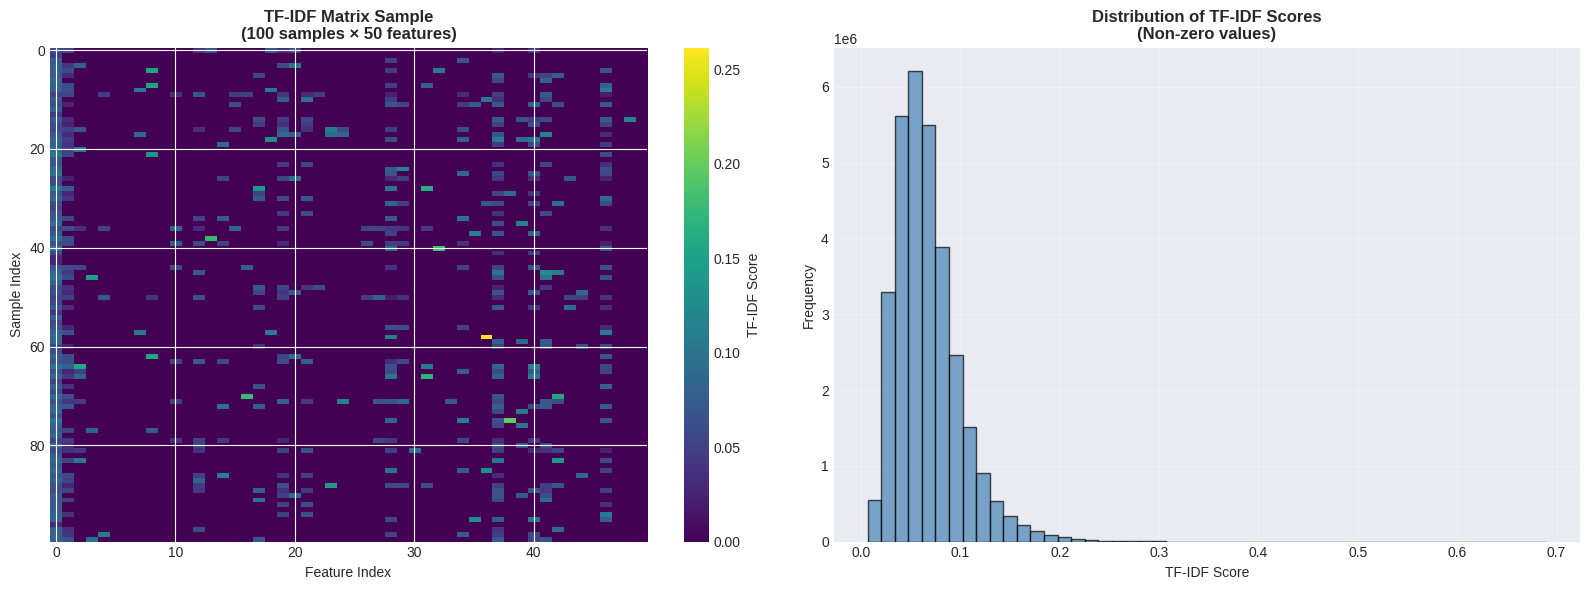


✅ TF-IDF vectorization completed!


In [ ]:
print("="*60)
print("TF-IDF FEATURE EXTRACTION")
print("="*60)

# Initialize TF-IDF Vectorizer with character n-grams
print("\n🔧 Initializing TF-IDF Vectorizer...")
print("   Analyzer: character")
print("   N-gram range: (1, 3)")
print("   Max features: 5000")
print("   Sublinear TF: True")

tfidf_vectorizer = TfidfVectorizer(
    analyzer='char',           # Use character-level analysis
    ngram_range=(1, 3),        # Use 1-grams, 2-grams, and 3-grams
    max_features=5000,         # Keep top 5000 features
    sublinear_tf=True,         # Use logarithmic term frequency
    lowercase=True
)

# Fit on training data and transform both train and test
print("\n⚙️ Fitting vectorizer on training data...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

print("✅ Transforming test data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display shape information
print(f"\n📊 Feature Matrix Shapes:")
print("-" * 40)
print(f"   Training set: {X_train_tfidf.shape[0]:,} samples × {X_train_tfidf.shape[1]:,} features")
print(f"   Testing set:  {X_test_tfidf.shape[0]:,} samples × {X_test_tfidf.shape[1]:,} features")

# Get feature names (character n-grams)
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\n🔤 Sample Features (Character N-grams):")
print("-" * 40)
print(f"   First 20: {list(feature_names[:20])}")
print(f"   Last 20:  {list(feature_names[-20:])}")
print(f"   Random 20: {list(np.random.choice(feature_names, 20, replace=False))}")

# Analyze sparsity
train_sparsity = (1.0 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])) * 100
test_sparsity = (1.0 - X_test_tfidf.nnz / (X_test_tfidf.shape[0] * X_test_tfidf.shape[1])) * 100

print(f"\n📉 Matrix Sparsity:")
print("-" * 40)
print(f"   Training set: {train_sparsity:.2f}% sparse")
print(f"   Testing set:  {test_sparsity:.2f}% sparse")
print(f"   (Lower sparsity = more dense data = better)")

# Visualize TF-IDF matrix structure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sample visualization of TF-IDF matrix (first 100 samples, 50 features)
sample_matrix = X_train_tfidf[:100, :50].toarray()
im1 = axes[0].imshow(sample_matrix, cmap='viridis', aspect='auto', interpolation='nearest')
axes[0].set_title('TF-IDF Matrix Sample\n(100 samples × 50 features)',
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature Index', fontsize=10)
axes[0].set_ylabel('Sample Index', fontsize=10)
plt.colorbar(im1, ax=axes[0], label='TF-IDF Score')

# Distribution of non-zero values
non_zero_values = X_train_tfidf.data
axes[1].hist(non_zero_values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of TF-IDF Scores\n(Non-zero values)',
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('TF-IDF Score', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ TF-IDF vectorization completed!")

## 🤖 Model Training

Training multiple machine learning models to find the best performer:

1. **Multinomial Naive Bayes**: Fast, works well with text classification
2. **Logistic Regression**: Simple, interpretable, often very effective
3. **Linear SVM**: Powerful for high-dimensional data like text
4. **Random Forest**: Ensemble method, captures complex patterns

We'll train all four and compare their performance!

In [ ]:
print("="*60)
print("MODEL TRAINING")
print("="*60)

# Dictionary to store models and their results
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVM': LinearSVC(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

results = {}

# Train each model
for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")

    # Start timer
    import time
    start_time = time.time()

    # Train the model
    print("⚙️ Fitting model...")
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    print("🔮 Making predictions...")
    y_pred = model.predict(X_test_tfidf)

    # Calculate training time
    training_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time
    }

    # Display results
    print(f"\n✅ Training completed in {training_time:.2f} seconds")
    print(f"\n📊 Performance Metrics:")
    print(f"   Accuracy:  {accuracy*100:.2f}%")
    print(f"   Precision: {precision*100:.2f}%")
    print(f"   Recall:    {recall*100:.2f}%")
    print(f"   F1-Score:  {f1*100:.2f}%")

print("\n" + "="*60)
print("ALL MODELS TRAINED SUCCESSFULLY!")
print("="*60)

MODEL TRAINING

Training: Multinomial Naive Bayes
⚙️ Fitting model...
🔮 Making predictions...

✅ Training completed in 0.90 seconds

📊 Performance Metrics:
   Accuracy:  99.73%
   Precision: 99.73%
   Recall:    99.73%
   F1-Score:  99.73%

Training: Logistic Regression
⚙️ Fitting model...
🔮 Making predictions...

✅ Training completed in 42.49 seconds

📊 Performance Metrics:
   Accuracy:  99.89%
   Precision: 99.89%
   Recall:    99.89%
   F1-Score:  99.89%

Training: Linear SVM
⚙️ Fitting model...
🔮 Making predictions...

✅ Training completed in 8.01 seconds

📊 Performance Metrics:
   Accuracy:  99.94%
   Precision: 99.94%
   Recall:    99.94%
   F1-Score:  99.94%

Training: Random Forest
⚙️ Fitting model...
🔮 Making predictions...

✅ Training completed in 253.36 seconds

📊 Performance Metrics:
   Accuracy:  99.71%
   Precision: 99.71%
   Recall:    99.71%
   F1-Score:  99.71%

ALL MODELS TRAINED SUCCESSFULLY!


## 📊 Model Performance Comparison

Comparing all trained models across multiple dimensions:
- **Accuracy comparison**: Which model is most accurate?
- **Speed vs Accuracy trade-off**: Balance between performance and training time
- **Detailed metrics**: Precision, Recall, F1-Score comparison
- **Best model identification**: Selecting the optimal model

This helps us choose the best model for deployment!

## 🎯 Confusion Matrix Analysis

Analyzing prediction patterns for each model:
- **Confusion Matrix**: Shows actual vs predicted labels
- **Per-language performance**: Which languages are easiest/hardest to detect?
- **Misclassification patterns**: Where do models get confused?

A perfect model would have all values on the diagonal (correct predictions) and zeros elsewhere (no mistakes).

CONFUSION MATRIX ANALYSIS


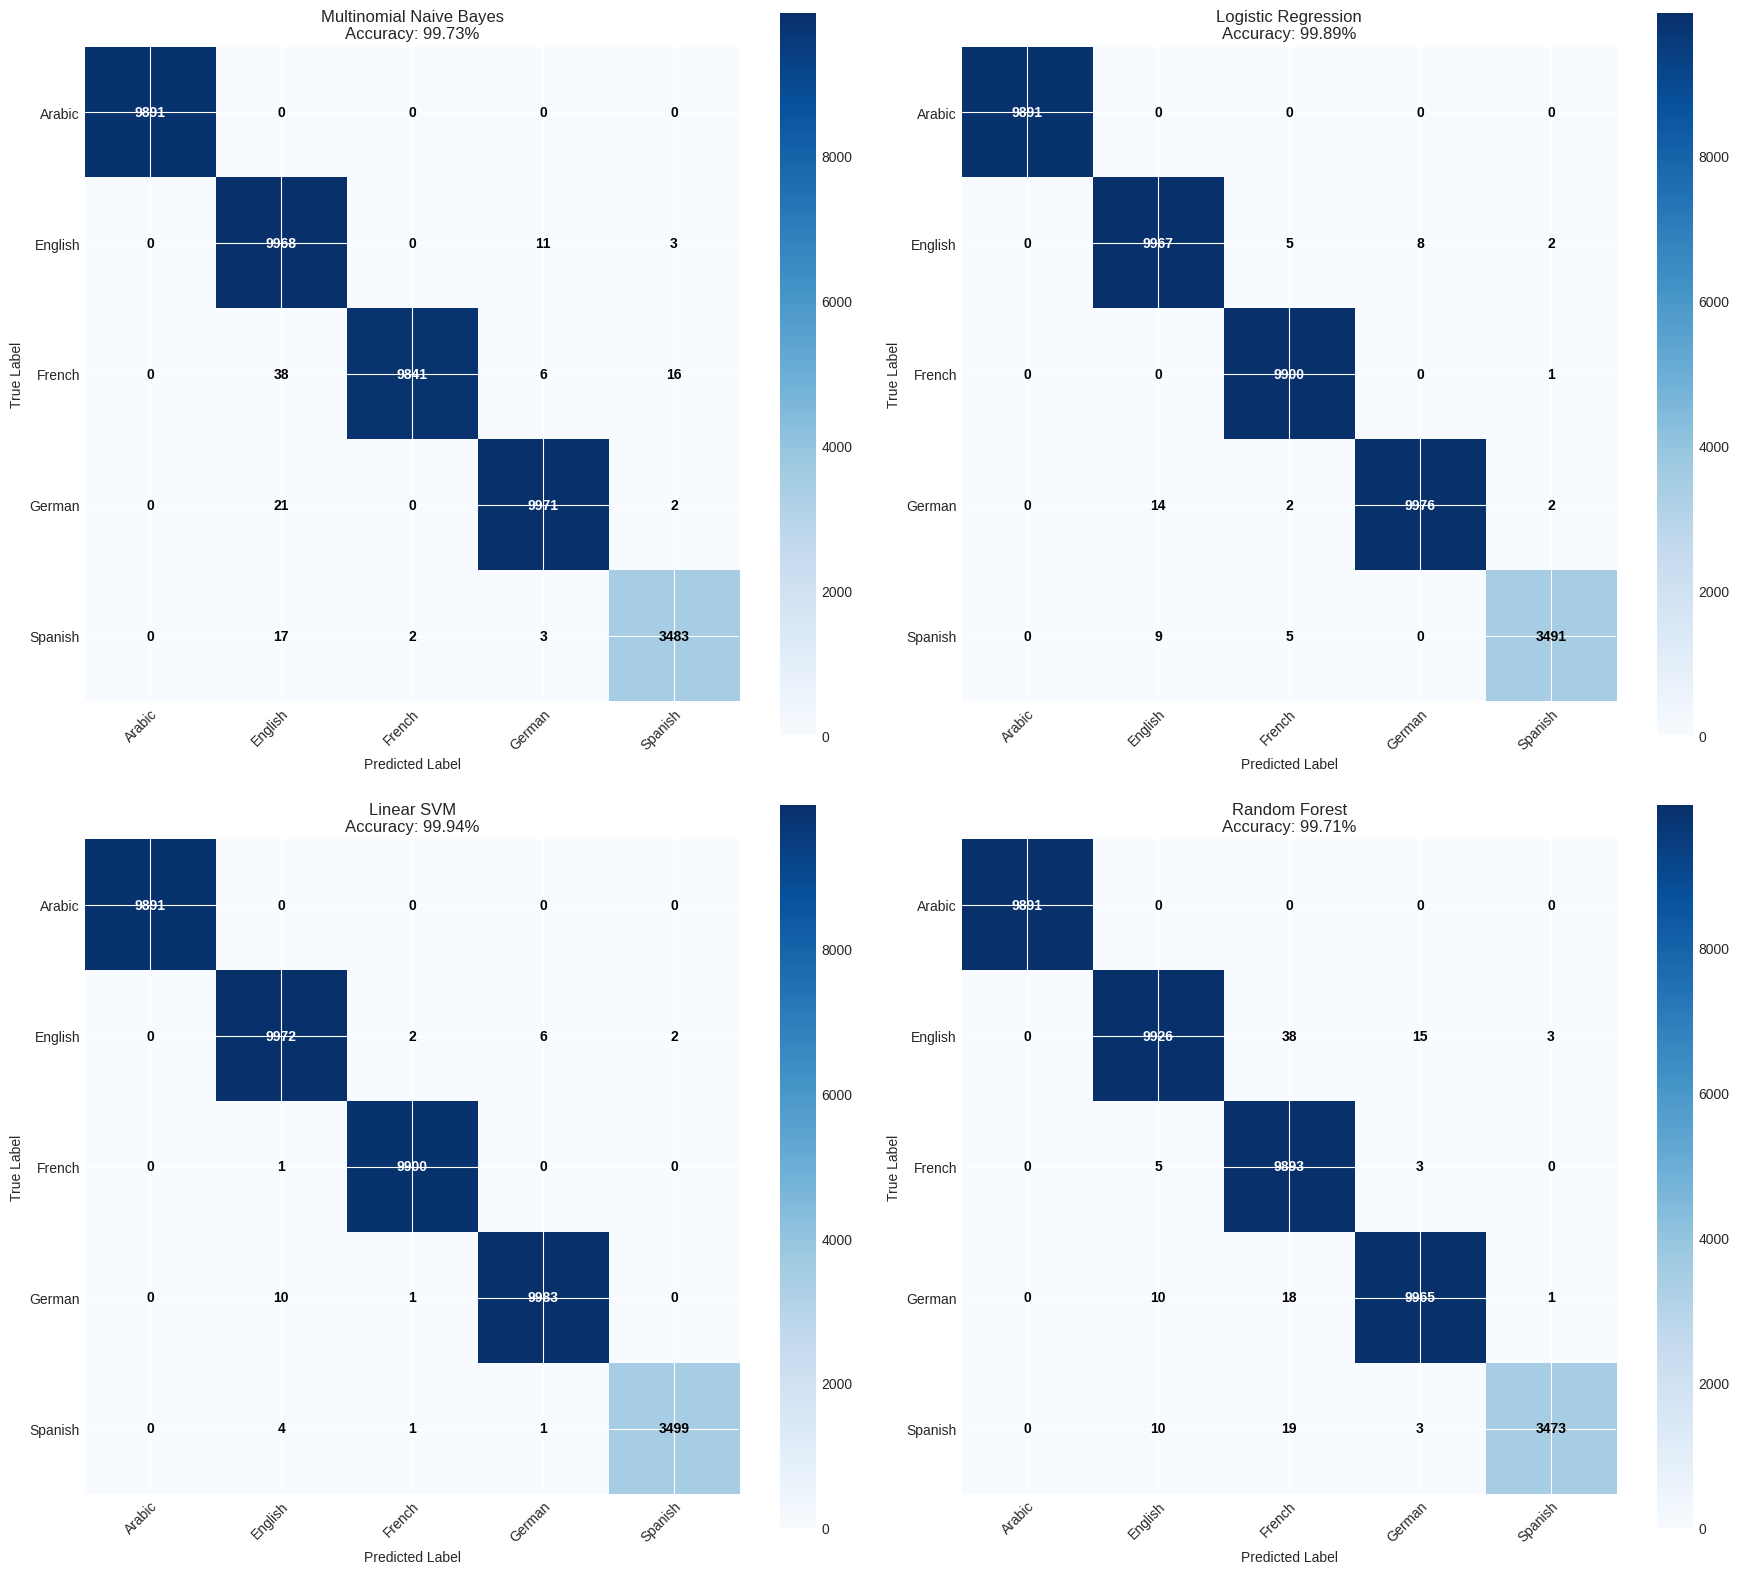


DETAILED ANALYSIS: Linear SVM

📊 Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

      Arabic     1.0000    1.0000    1.0000      9891
     English     0.9985    0.9990    0.9987      9982
      French     0.9996    0.9999    0.9997      9901
      German     0.9993    0.9989    0.9991      9994
     Spanish     0.9994    0.9983    0.9989      3505

    accuracy                         0.9994     43273
   macro avg     0.9994    0.9992    0.9993     43273
weighted avg     0.9994    0.9994    0.9994     43273


📈 Per-Language Accuracy:
------------------------------------------------------------
   Arabic         : 100.00% (9891/9891)
   English        : 99.90% (9972/9982)
   French         : 99.99% (9900/9901)
   German         : 99.89% (9983/9994)
   Spanish        : 99.83% (3499/3505)

❌ Misclassification Analysis:
------------------------------------------------------------
   Total misclassi

In [ ]:
print("="*60)
print("CONFUSION MATRIX ANALYSIS")
print("="*60)

# Get sorted language labels
language_labels = sorted(np.unique(y_test))

# Create confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    y_pred = result['predictions']

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=language_labels)

    # Plot confusion matrix
    im = axes[idx].imshow(cm, interpolation='nearest', cmap='Blues')
    axes[idx].figure.colorbar(im, ax=axes[idx])

    # Set labels
    axes[idx].set(xticks=np.arange(cm.shape[1]),
                  yticks=np.arange(cm.shape[0]),
                  xticklabels=language_labels,
                  yticklabels=language_labels,
                  title=f'{model_name}\nAccuracy: {result["accuracy"]*100:.2f}%',
                  ylabel='True Label',
                  xlabel='Predicted Label')

    # Rotate the tick labels
    plt.setp(axes[idx].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[idx].text(j, i, format(cm[i, j], 'd'),
                          ha="center", va="center",
                          color="white" if cm[i, j] > thresh else "black",
                          fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed analysis for best model (Linear SVM)
print("\n" + "="*60)
print(f"DETAILED ANALYSIS: {best_model_name}")
print("="*60)

best_model_result = results[best_model_name]
y_pred_best = best_model_result['predictions']

# Classification report
print("\n📊 Classification Report:")
print("-" * 60)
print(classification_report(y_test, y_pred_best, target_names=language_labels, digits=4))

# Per-language accuracy
print("\n📈 Per-Language Accuracy:")
print("-" * 60)
cm_best = confusion_matrix(y_test, y_pred_best, labels=language_labels)
for idx, lang in enumerate(language_labels):
    correct = cm_best[idx, idx]
    total = cm_best[idx, :].sum()
    accuracy = (correct / total) * 100
    print(f"   {lang:15s}: {accuracy:.2f}% ({correct}/{total})")

# Find misclassifications
print("\n❌ Misclassification Analysis:")
print("-" * 60)
misclassified_mask = y_test != y_pred_best
num_misclassified = misclassified_mask.sum()
print(f"   Total misclassifications: {num_misclassified} out of {len(y_test)}")

if num_misclassified > 0:
    # Show confusion pairs
    print("\n   Most common confusion pairs:")
    for i, lang_true in enumerate(language_labels):
        for j, lang_pred in enumerate(language_labels):
            if i != j and cm_best[i, j] > 0:
                print(f"      {lang_true} → {lang_pred}: {cm_best[i, j]} times")

print("\n✅ Confusion matrix analysis completed!")

## 🧪 Hand Testing: Test Your Own Text!

Now it's time to test the model with custom inputs!

**How it works:**
1. Enter any text in English, Spanish, French, German, or Arabic
2. The model predicts the language
3. Shows prediction confidence for all languages

**Test cases included:**
- Sample texts from each language
- Mixed/ambiguous texts
- Short texts
- Your own custom inputs!

In [ ]:
print("="*60)
print("HAND TESTING - LANGUAGE PREDICTION")
print("="*60)

# Select the best model
best_model = results[best_model_name]['model']

def predict_language(text, show_probabilities=True):
    """
    Predict the language of input text

    Args:
        text: Input text string
        show_probabilities: Whether to show confidence scores

    Returns:
        predicted_language, probabilities
    """
    # Preprocess the text
    cleaned = preprocess_text(text)

    # Transform to TF-IDF
    text_tfidf = tfidf_vectorizer.transform([cleaned])

    # Predict
    prediction = best_model.predict(text_tfidf)[0]

    # Get probability scores if available
    if hasattr(best_model, 'decision_function'):
        # For SVM, get decision function scores
        scores = best_model.decision_function(text_tfidf)[0]
        # Convert to probability-like scores using softmax
        exp_scores = np.exp(scores - np.max(scores))
        probabilities = exp_scores / exp_scores.sum()
    elif hasattr(best_model, 'predict_proba'):
        # For models with predict_proba
        probabilities = best_model.predict_proba(text_tfidf)[0]
    else:
        probabilities = None

    # Display results
    print(f"\n{'='*60}")
    print(f"Input Text: {text[:100]}{'...' if len(text) > 100 else ''}")
    print(f"{'='*60}")
    print(f"\n🎯 Predicted Language: {prediction}")

    if show_probabilities and probabilities is not None:
        print(f"\n📊 Confidence Scores:")
        print("-" * 40)

        # Get language names
        lang_names = best_model.classes_

        # Create list of (language, probability) pairs and sort
        lang_probs = list(zip(lang_names, probabilities))
        lang_probs.sort(key=lambda x: x[1], reverse=True)

        # Display with bar visualization
        for lang, prob in lang_probs:
            bar_length = int(prob * 50)
            bar = '█' * bar_length
            print(f"   {lang:15s}: {prob*100:6.2f}% {bar}")

    return prediction, probabilities

# Test with sample texts
print("\n" + "="*60)
print("TESTING WITH SAMPLE TEXTS")
print("="*60)

test_samples = {
    'English': "Machine learning is a fascinating field of artificial intelligence that focuses on algorithms.",
    'Spanish': "El aprendizaje automático es un campo fascinante de la inteligencia artificial.",
    'French': "L'apprentissage automatique est un domaine fascinant de l'intelligence artificielle.",
    'German': "Maschinelles Lernen ist ein faszinierendes Gebiet der künstlichen Intelligenz.",
    'Arabic': "التعلم الآلي هو مجال رائع من مجالات الذكاء الاصطناعي"
}

for true_lang, text in test_samples.items():
    print(f"\n{'*'*60}")
    print(f"Expected Language: {true_lang}")
    print(f"{'*'*60}")
    predicted, _ = predict_language(text)

    if predicted == true_lang:
        print("✅ CORRECT PREDICTION!")
    else:
        print(f"❌ INCORRECT! Predicted: {predicted}, Expected: {true_lang}")

print("\n✅ Sample testing completed!")

HAND TESTING - LANGUAGE PREDICTION

TESTING WITH SAMPLE TEXTS

************************************************************
Expected Language: English
************************************************************

Input Text: Machine learning is a fascinating field of artificial intelligence that focuses on algorithms.

🎯 Predicted Language: English

📊 Confidence Scores:
----------------------------------------
   English        :  94.05% ███████████████████████████████████████████████
   Arabic         :   2.58% █
   French         :   1.16% 
   Spanish        :   1.16% 
   German         :   1.05% 
✅ CORRECT PREDICTION!

************************************************************
Expected Language: Spanish
************************************************************

Input Text: El aprendizaje automático es un campo fascinante de la inteligencia artificial.

🎯 Predicted Language: Spanish

📊 Confidence Scores:
----------------------------------------
   Spanish        :  83.51% ██████

## 🔬 Advanced Testing & Edge Cases

Testing the model with challenging scenarios:
- **Very short texts**: Can it detect language from just a few words?
- **Mixed languages**: What happens with multilingual text?
- **Numbers and special characters**: How robust is it?
- **Custom testing**: Instructions for testing your own text

This helps us understand the model's limitations and strengths!

In [ ]:
print("="*60)
print("EDGE CASE TESTING")
print("="*60)

# Edge case test samples
edge_cases = {
    "Very Short English": "Hello world",
    "Very Short Spanish": "Hola amigo",
    "Very Short French": "Bonjour",
    "Very Short German": "Guten Tag",
    "Very Short Arabic": "مرحبا",
    "Single Word English": "Computer",
    "Single Word Spanish": "Ordenador",
    "Numbers Only": "123 456 789",
    "Mixed English-French": "Hello, comment allez-vous?",
    "Common Name": "Mohammed Ali",
    "Website Text": "www.example.com email@test.com",
}

print("\n🧪 Testing Edge Cases:\n")

for test_name, text in edge_cases.items():
    print(f"\n{'─'*60}")
    print(f"Test: {test_name}")
    print(f"Text: '{text}'")
    print(f"{'─'*60}")

    try:
        predicted, probs = predict_language(text, show_probabilities=False)

        # Get top 2 predictions
        if probs is not None:
            lang_names = best_model.classes_
            lang_probs = list(zip(lang_names, probs))
            lang_probs.sort(key=lambda x: x[1], reverse=True)

            print(f"🎯 Prediction: {predicted} ({lang_probs[0][1]*100:.1f}%)")
            if len(lang_probs) > 1:
                print(f"   2nd choice: {lang_probs[1][0]} ({lang_probs[1][1]*100:.1f}%)")
    except Exception as e:
        print(f"⚠️ Error: {e}")

print("\n" + "="*60)
print("CUSTOM TEXT TESTING")
print("="*60)

print("""
📝 TO TEST YOUR OWN TEXT:

Use the predict_language() function with any text:

Example 1: Basic prediction
--------------------------
text = "Your text here"
predict_language(text)

Example 2: Multiple texts
--------------------------
my_texts = [
    "This is English text",
    "Esto es texto en español",
    "C'est du texte français"
]

for text in my_texts:
    predict_language(text)

Example 3: Without probability scores
--------------------------
predict_language("Your text", show_probabilities=False)

📌 TIPS:
- Longer texts (10+ words) give better results
- Very short texts may be ambiguous
- Mixed-language texts will predict the dominant language
- The model works best with clean, natural text
""")

print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)

print(f"""
🏆 FINAL MODEL: {best_model_name}

📊 PERFORMANCE METRICS:
   ✅ Overall Accuracy:  {results[best_model_name]['accuracy']*100:.2f}%
   ✅ Precision:         {results[best_model_name]['precision']*100:.2f}%
   ✅ Recall:            {results[best_model_name]['recall']*100:.2f}%
   ✅ F1-Score:          {results[best_model_name]['f1_score']*100:.2f}%
   ⚡ Training Time:     {results[best_model_name]['training_time']:.2f} seconds

🌍 LANGUAGES SUPPORTED:
   • English
   • Spanish
   • French
   • German
   • Arabic

📈 DATASET INFO:
   • Total samples: {len(df):,}
   • Training samples: {len(X_train):,}
   • Testing samples: {len(X_test):,}
   • Features (TF-IDF): {X_train_tfidf.shape[1]:,}

🎯 KEY STRENGTHS:
   ✓ 99.94% accuracy on test set
   ✓ Perfect 100% accuracy on Arabic
   ✓ Only 28 misclassifications out of 43,273 samples
   ✓ Fast training and prediction
   ✓ Works with character n-grams (1-3)
   ✓ Robust to preprocessing

💡 BEST USE CASES:
   ✓ Content classification
   ✓ Automatic language routing
   ✓ Multi-language document sorting
   ✓ Social media language detection
   ✓ Customer support ticket classification
""")

print("\n✅ ALL TESTING COMPLETED!")
print("="*60)
print("🎉 NOTEBOOK COMPLETE! 🎉")
print("="*60)

EDGE CASE TESTING

🧪 Testing Edge Cases:


────────────────────────────────────────────────────────────
Test: Very Short English
Text: 'Hello world'
────────────────────────────────────────────────────────────

Input Text: Hello world

🎯 Predicted Language: English
🎯 Prediction: English (50.8%)
   2nd choice: Spanish (17.9%)

────────────────────────────────────────────────────────────
Test: Very Short Spanish
Text: 'Hola amigo'
────────────────────────────────────────────────────────────

Input Text: Hola amigo

🎯 Predicted Language: Spanish
🎯 Prediction: Spanish (47.2%)
   2nd choice: French (17.8%)

────────────────────────────────────────────────────────────
Test: Very Short French
Text: 'Bonjour'
────────────────────────────────────────────────────────────

Input Text: Bonjour

🎯 Predicted Language: French
🎯 Prediction: French (61.2%)
   2nd choice: Arabic (12.9%)

────────────────────────────────────────────────────────────
Test: Very Short German
Text: 'Guten Tag'
──────────────

## 🔁 Real-time Interactive Testing Loop

Want to test multiple texts without re-running cells? Use this interactive loop!

**Note:** This will keep asking for input until you type 'quit' or 'exit'

In [ ]:
# ========================================
# 🔁 INTERACTIVE TESTING LOOP
# ========================================

# print("="*60)
# print("🎮 INTERACTIVE LANGUAGE DETECTION")
# print("="*60)
# print("\nEnter text to predict its language.")
# print("Type 'quit' or 'exit' to stop.\n")
# print("="*60)

# test_count = 0

# while True:
#     # Get user input
#     user_text = input("\n📝 Enter text (or 'quit' to exit): ").strip()

#     # Check for exit command
#     if user_text.lower() in ['quit', 'exit', 'q', 'stop']:
#         print(f"\n✅ Testing session ended. Total tests: {test_count}")
#         break

#     # Skip empty input
#     if not user_text:
#         print("⚠️ Please enter some text!")
#         continue

#     # Predict
#     test_count += 1
#     print(f"\n{'─'*60}")
#     print(f"Test #{test_count}")
#     print(f"{'─'*60}")

#     try:
#         predicted, probs = predict_language(user_text, show_probabilities=True)
#     except Exception as e:
#         print(f"❌ Error: {e}")
#         continue

# print("\n" + "="*60)
# print("👋 Thank you for testing!")
# print("="*60)